# Scenario/Robustness analysis

In [1]:
# Importing external packages

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
# Importing model scripts, by first adding the main folder path

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
import plotter

import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont("Minion Pro Regular.ttf")
matplotlib.rc("font", family="Minion Pro")

from matplotlib import rcParams

rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"

Read the results of the open exploration:

In [3]:
experiments = pd.read_csv("../outputs/experiments_exploration.csv").drop(
    columns="Unnamed: 0"
)
outcomes = pd.read_csv("../outputs/outcomes_exploration.csv").drop(columns="Unnamed: 0")

In [4]:
outcomes["policy"] = experiments["policy"]

In [8]:
outcomes.describe()

egypt_irr      egypt_90  egypt_low_had     sudan_irr      sudan_90  \
count  30000.000000  30000.000000   30000.000000  30000.000000  30000.000000   
mean       6.389825      1.740918       0.183919      0.044791      0.000488   
std        4.979955      1.213819       0.253528      0.085948      0.005531   
min        0.003427      0.000000       0.000000      0.000000      0.000000   
25%        2.216116      0.747158       0.000000      0.000000      0.000000   
50%        5.304862      1.633413       0.008333      0.001460      0.000000   
75%        9.578601      2.575240       0.329167      0.048676      0.000000   
max       28.569848      6.547417       0.875000      0.645968      0.133038   

       ethiopia_hydro  
count    30000.000000  
mean        10.965865  
std          3.249285  
min          4.580897  
25%          8.396527  
50%         10.718704  
75%         13.638551  
max         17.515071

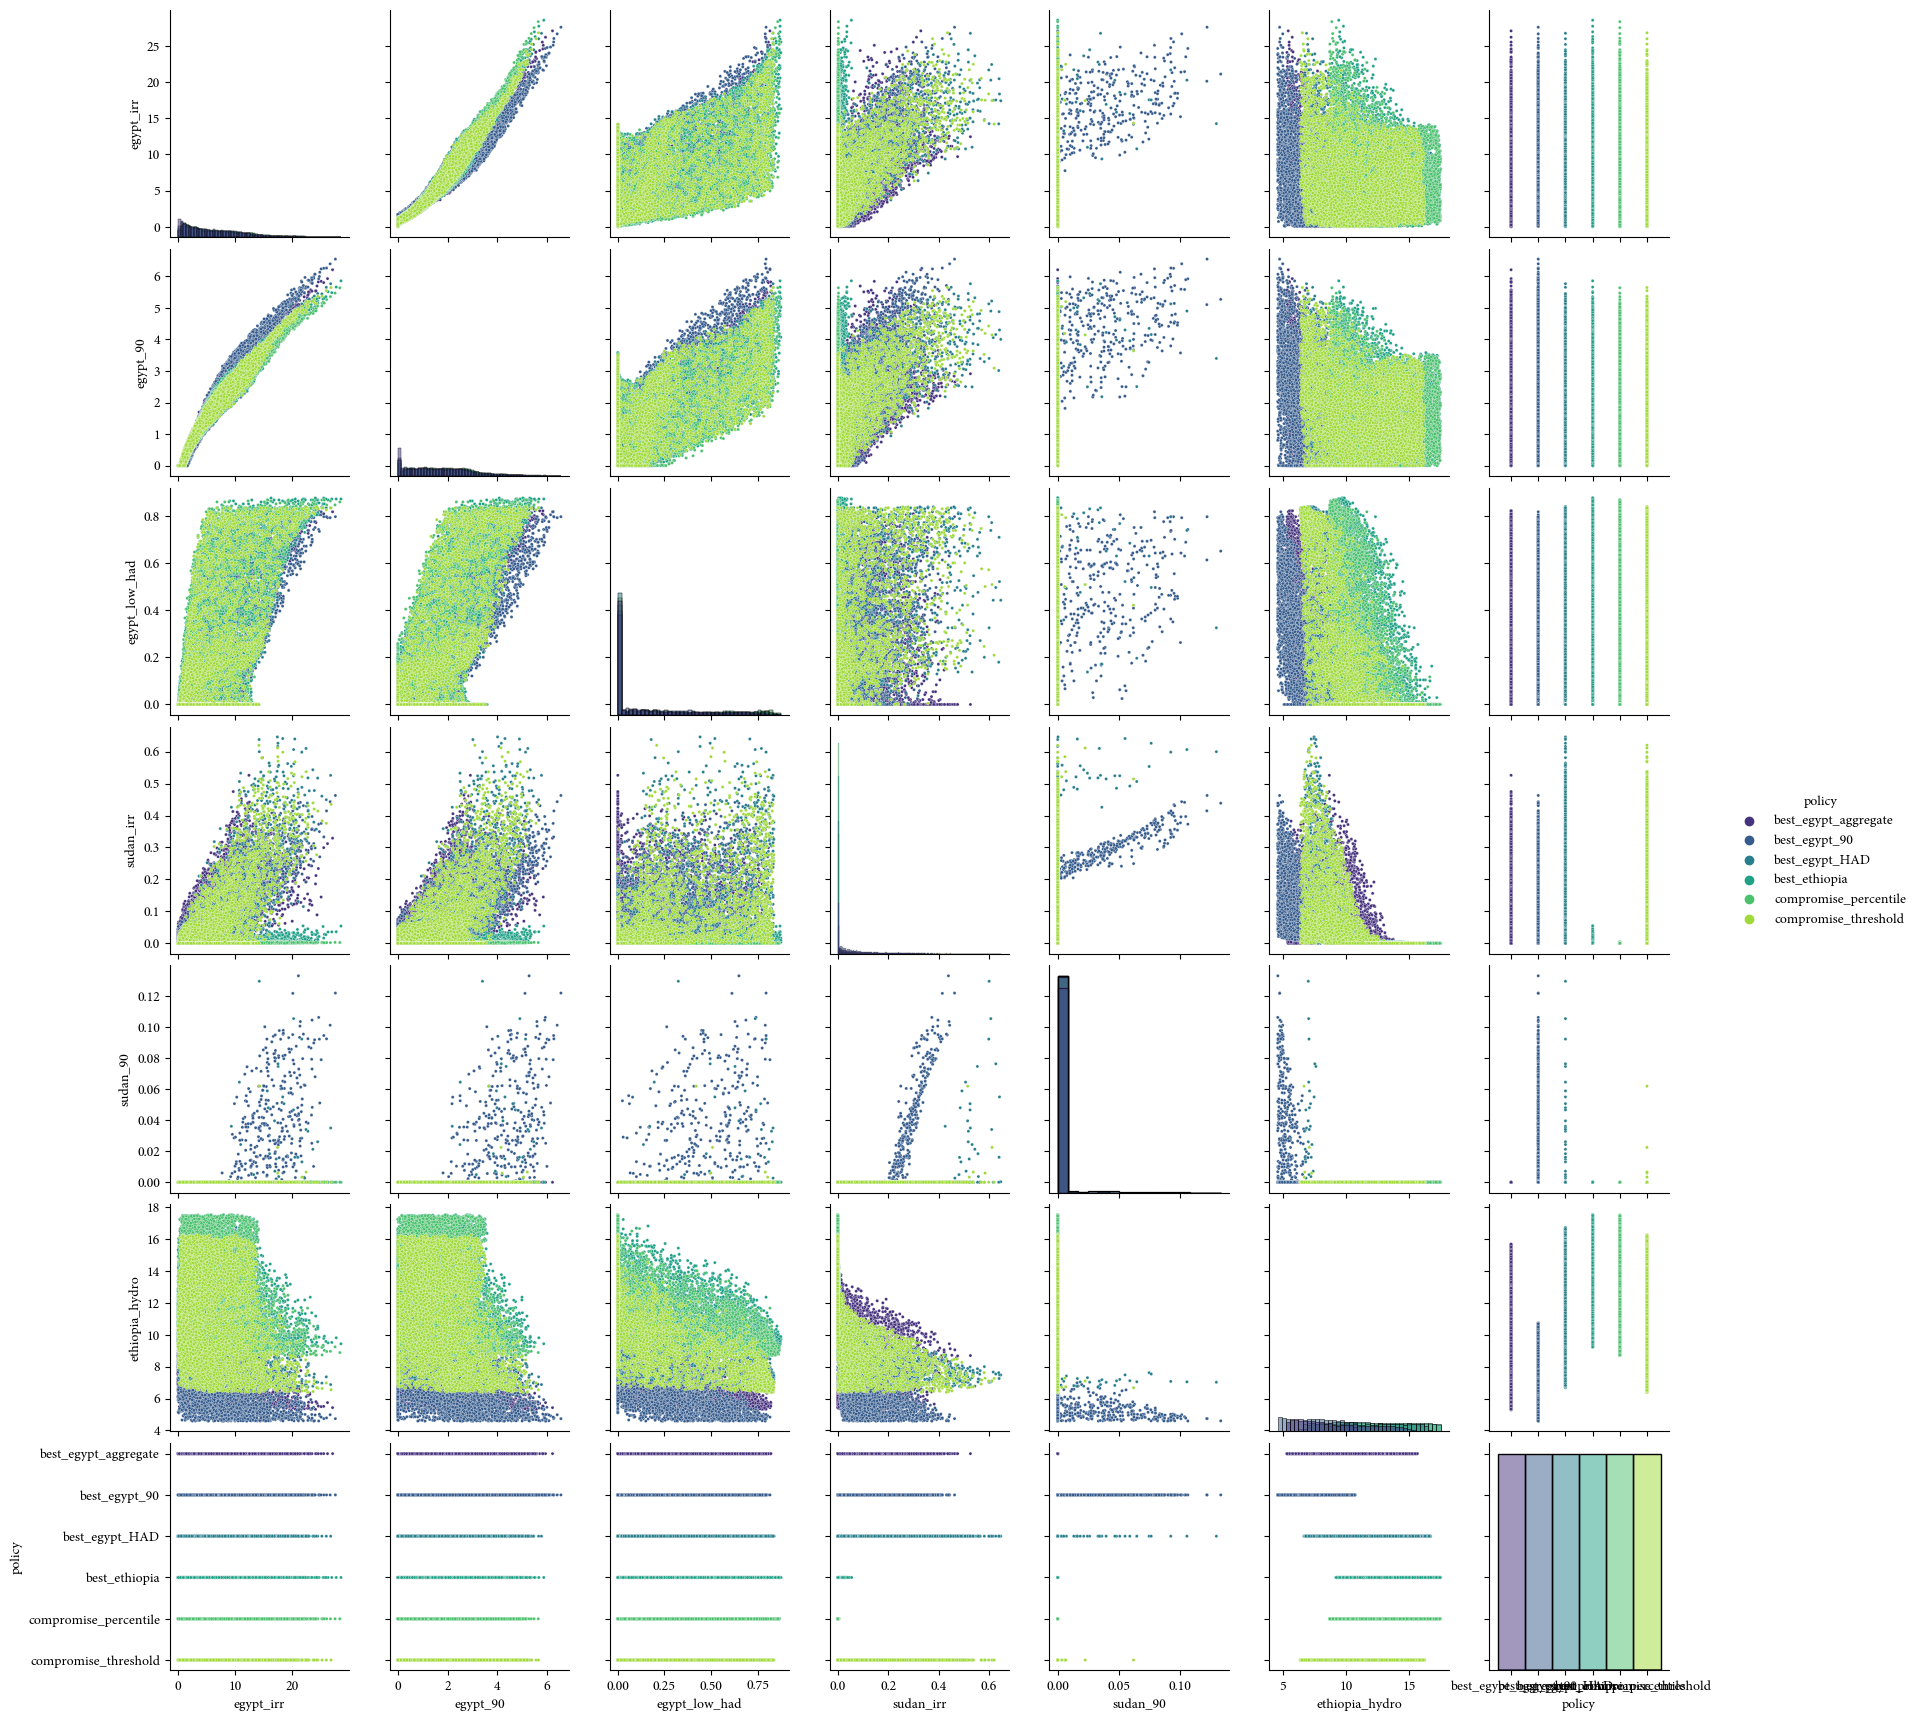

In [9]:
# Let's see all objectives against one another, policies color-coded:
sns.pairplot(
    outcomes,
    hue="policy",
    vars=outcomes.keys(),
    diag_kind="hist",
    plot_kws={"s": 5},
    palette="viridis",
)
plt.xticks(rotation=45)
plt.show()

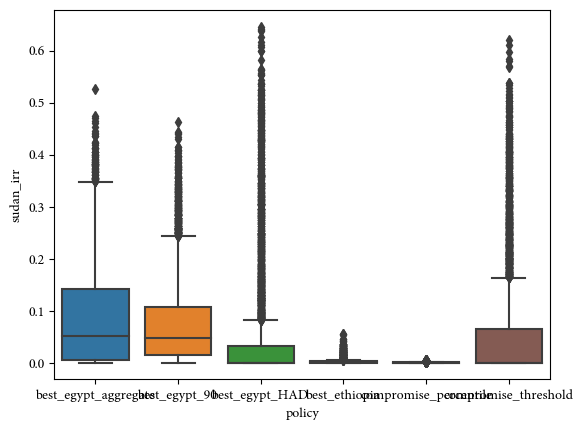

In [18]:

sns.violinplot(x="policy", y="sudan_irr", data=outcomes)
plt.show()

## Percentile compromise seems to be performing very well even in terms of Ethiopia Hydropower almost as good as the best Ethiopia policy. Check if they perform the same in all scenarios, or in certain scenarios compromise is better or vice versa!

In [19]:
# All the factors for global sensitivity analysis in the same dataframe:
experiments.iloc[:, [0, 1, 2, 3, 4, 5, 6, -2]]

atbara_dev_coef  atbara_mean_coef  blue_nile_dev_coef  \
0             1.471380          0.800738            1.386853   
1             0.569234          1.031349            0.655280   
2             0.632213          0.788649            1.299785   
3             1.197767          0.976064            1.470813   
4             0.570210          1.210193            0.662523   
...                ...               ...                 ...   
29995         1.308495          0.931921            1.338154   
29996         1.456176          1.050605            1.037758   
29997         1.257144          1.121553            0.544593   
29998         0.919233          1.152845            0.705375   
29999         1.303976          1.066538            0.977204   

       blue_nile_mean_coef  white_nile_dev_coef  white_nile_mean_coef  \
0                 1.105452             1.016471              0.982653   
1                 0.942534             0.588134              0.873701   
2                 1.236697             1.343692              1.218914   
3                 1.170307             1.288438              1.199654   
4                 0.960108             1.254217              1.052744   
...                    ...                  ...                   ...   
29995             0.962601             1.121466              1.044193   
29996             1.080653             0.960639              1.081646   
29997             0.969784             1.314685              0.759204   
29998             0.966616             1.164065              1.080812   
29999             0.787624             0.728672              0.895816   

       yearly_demand_growth_rate                policy  
0                       0.024671  best_egypt_aggregate  
1                       0.023330  best_egypt_aggregate  
2                       0.019643  best_egypt_aggregate  
3                       0.011049  best_egypt_aggregate  
4                       0.023226  best_egypt_aggregate  
...                          ...                   ...  
29995                   0.017518  compromise_threshold  
29996                   0.018508  compromise_threshold  
29997                   0.020098  compromise_threshold  
29998                   0.016320  compromise_threshold  
29999                   0.018648  compromise_threshold  

[30000 rows x 8 columns]

In [9]:
outcomes.describe()

egypt_irr      egypt_90  egypt_low_had     sudan_irr      sudan_90  \
count  30000.000000  30000.000000   30000.000000  30000.000000  30000.000000   
mean       6.389825      1.740918       0.183919      0.044791      0.000488   
std        4.979955      1.213819       0.253528      0.085948      0.005531   
min        0.003427      0.000000       0.000000      0.000000      0.000000   
25%        2.216116      0.747158       0.000000      0.000000      0.000000   
50%        5.304862      1.633413       0.008333      0.001460      0.000000   
75%        9.578601      2.575240       0.329167      0.048676      0.000000   
max       28.569848      6.547417       0.875000      0.645968      0.133038   

       ethiopia_hydro  
count    30000.000000  
mean        10.965865  
std          3.249285  
min          4.580897  
25%          8.396527  
50%         10.718704  
75%         13.638551  
max         17.515071

In [20]:
sum(outcomes["sudan_90"] > 0)

340

In [21]:
out_dict = dict()
for col in outcomes.iloc[:, :-1].columns:
    out_dict[col] = np.array(outcomes[col])
out_dict

{'egypt_irr': array([6.52705659, 8.76670943, 3.38922539, ..., 6.23265277, 2.3227058 ,
        8.38865557]),
 'egypt_90': array([1.74252637, 2.33305574, 1.30553512, ..., 1.7320025 , 0.92099161,
        2.59460191]),
 'egypt_low_had': array([0.        , 0.3625    , 0.        , ..., 0.30416667, 0.        ,
        0.67083333]),
 'sudan_irr': array([0.12474788, 0.10437194, 0.        , ..., 0.0454802 , 0.        ,
        0.09520356]),
 'sudan_90': array([0., 0., 0., ..., 0., 0., 0.]),
 'ethiopia_hydro': array([10.72416017,  7.71477483, 15.07099751, ..., 10.04065906,
        11.31646295,  7.06401762])}

In [22]:
from ema_workbench.analysis import feature_scoring
import numpy as np

np.random.seed(123)

scores = feature_scoring.get_feature_scores_all(
    experiments.iloc[:, [0, 1, 2, 3, 4, 5, 6, -2]], out_dict, nr_trees=1000
)
scores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

egypt_irr  egypt_90  egypt_low_had  sudan_irr  \
0                                                                          
atbara_dev_coef             0.009737  0.011826       0.010446   0.007473   
atbara_mean_coef            0.018036  0.021585       0.050967   0.014492   
blue_nile_dev_coef          0.009570  0.011178       0.009398   0.014998   
blue_nile_mean_coef         0.147323  0.183750       0.623557   0.292868   
policy                      0.002981  0.008457       0.013450   0.341552   
white_nile_dev_coef         0.009775  0.011050       0.009313   0.007002   
white_nile_mean_coef        0.070547  0.099549       0.240385   0.012376   
yearly_demand_growth_rate   0.732030  0.652605       0.042485   0.309239   

                           sudan_90  ethiopia_hydro  
0                                                    
atbara_dev_coef            0.018331        0.002710  
atbara_mean_coef           0.021282        0.003194  
blue_nile_dev_coef         0.039506        0.002632  
blue_nile_mean_coef        0.298846        0.606509  
policy                     0.277466        0.374067  
white_nile_dev_coef        0.019694        0.002511  
white_nile_mean_coef       0.017781        0.005720  
yearly_demand_growth_rate  0.307094        0.002656

In [23]:
scores = scores.iloc[[4, 0, 1, 2, 3, 5, 6, 7]]

In [25]:
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("precision", 2)
scores.columns = [
    "Egypt Irr. Deficit",
    "Egypt $90^{th}$ Irr. Deficit",
    "Egypt Low HAD",
    "Sudan Irr. Deficit",
    "Sudan $90^{th}$ Irr. Deficit",
    "Ethiopia Hydropower",
]
scores = scores.set_index(
    pd.Series(
        [
            "Policy",
            "Atbara Deviation Multiplier",
            "Atbara Mean Multiplier",
            "Blue Nile Deviation Multiplier",
            "Blue Nile Mean Multiplier",
            "White Nile Deviation Multiplier",
            "White Nile Mean Multiplier",
            "Demand Growth Rate",
        ]
    )
)
scores.index.name = None
# scores=round(scores,2)
scores.style.background_gradient(axis=None)

In [27]:
from ema_workbench.analysis import dimensional_stacking

------------
egypt_irr
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


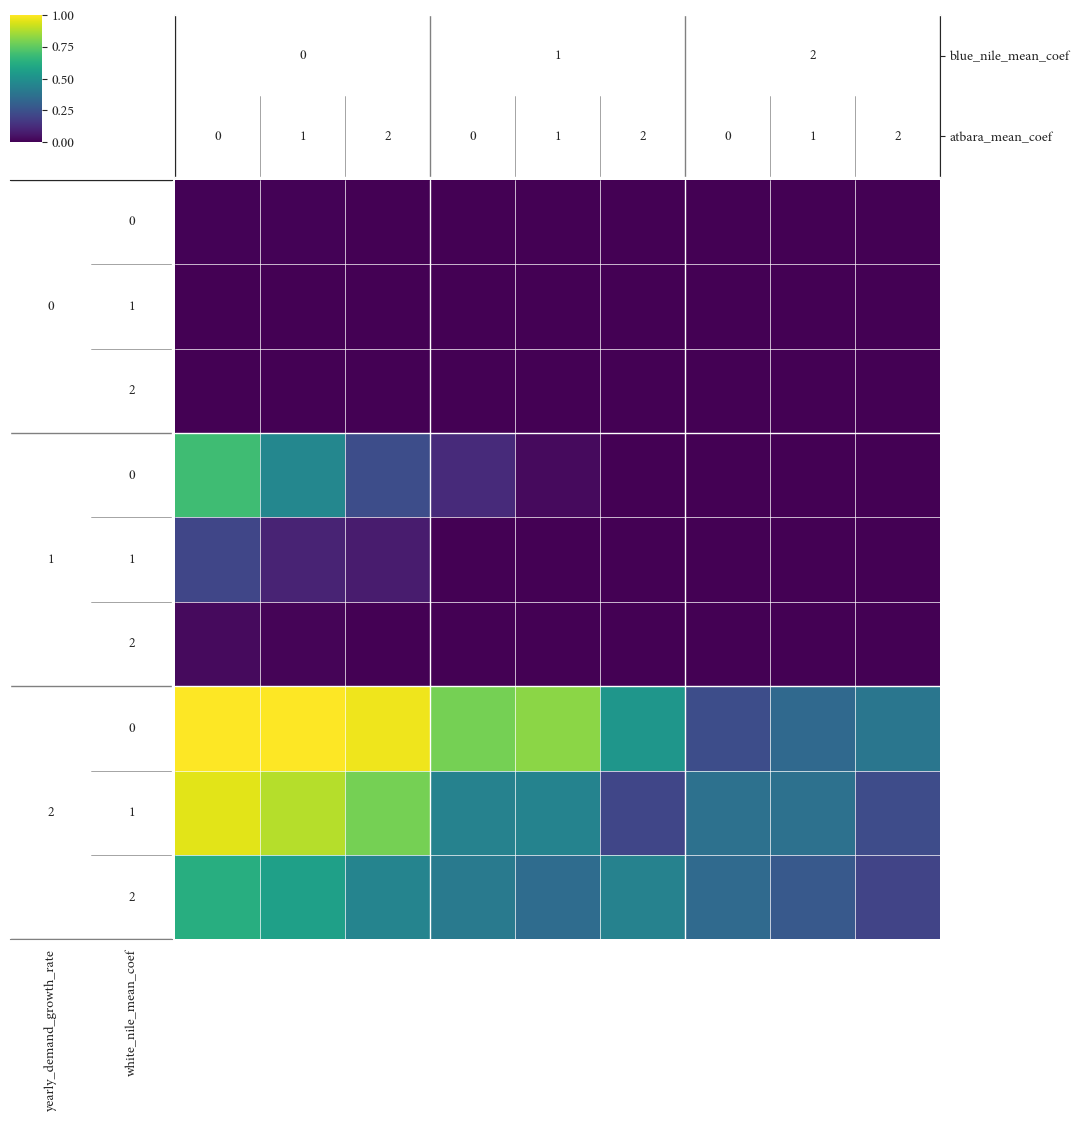

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


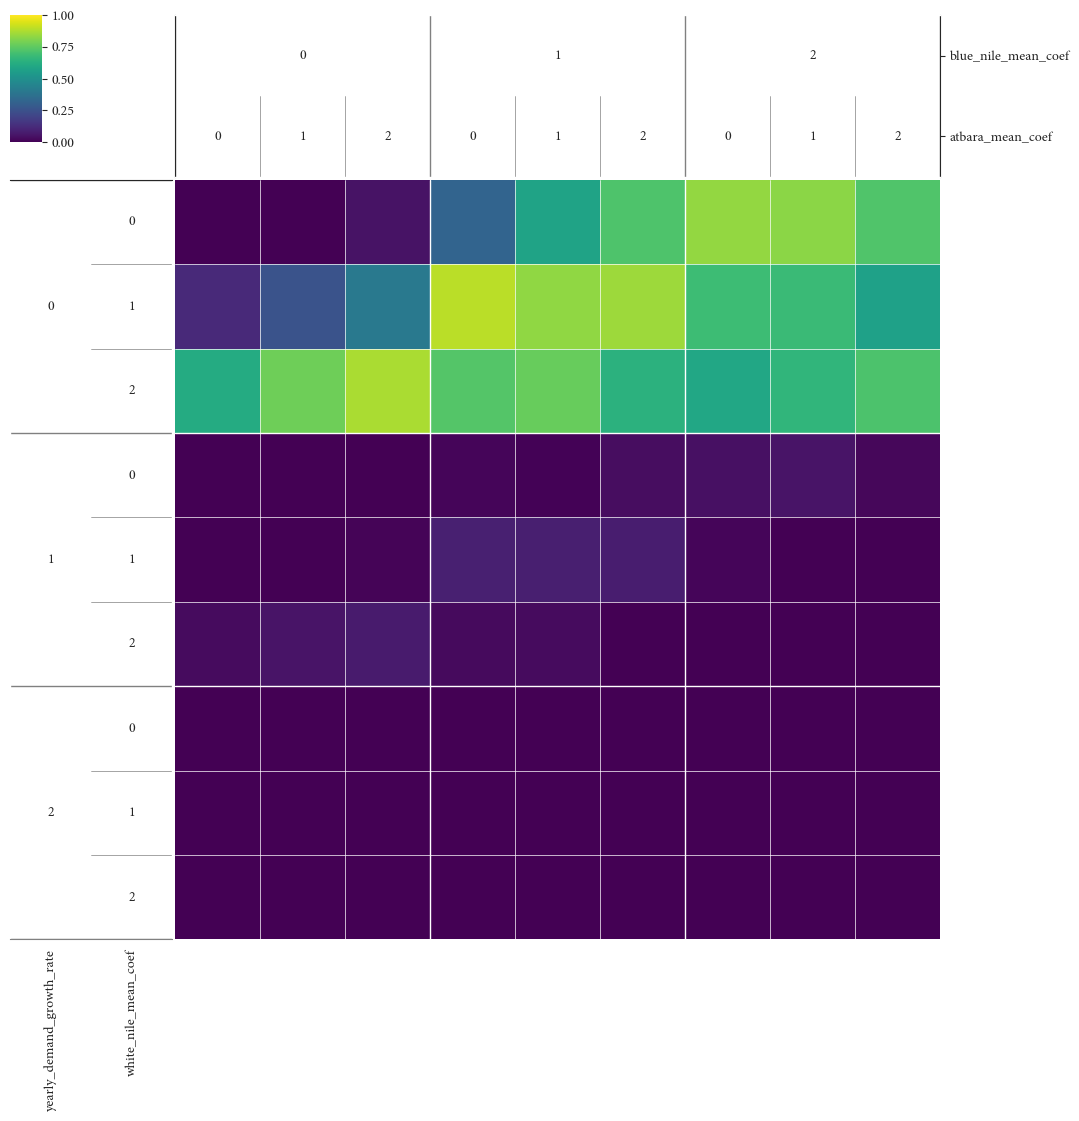

------------
egypt_90
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


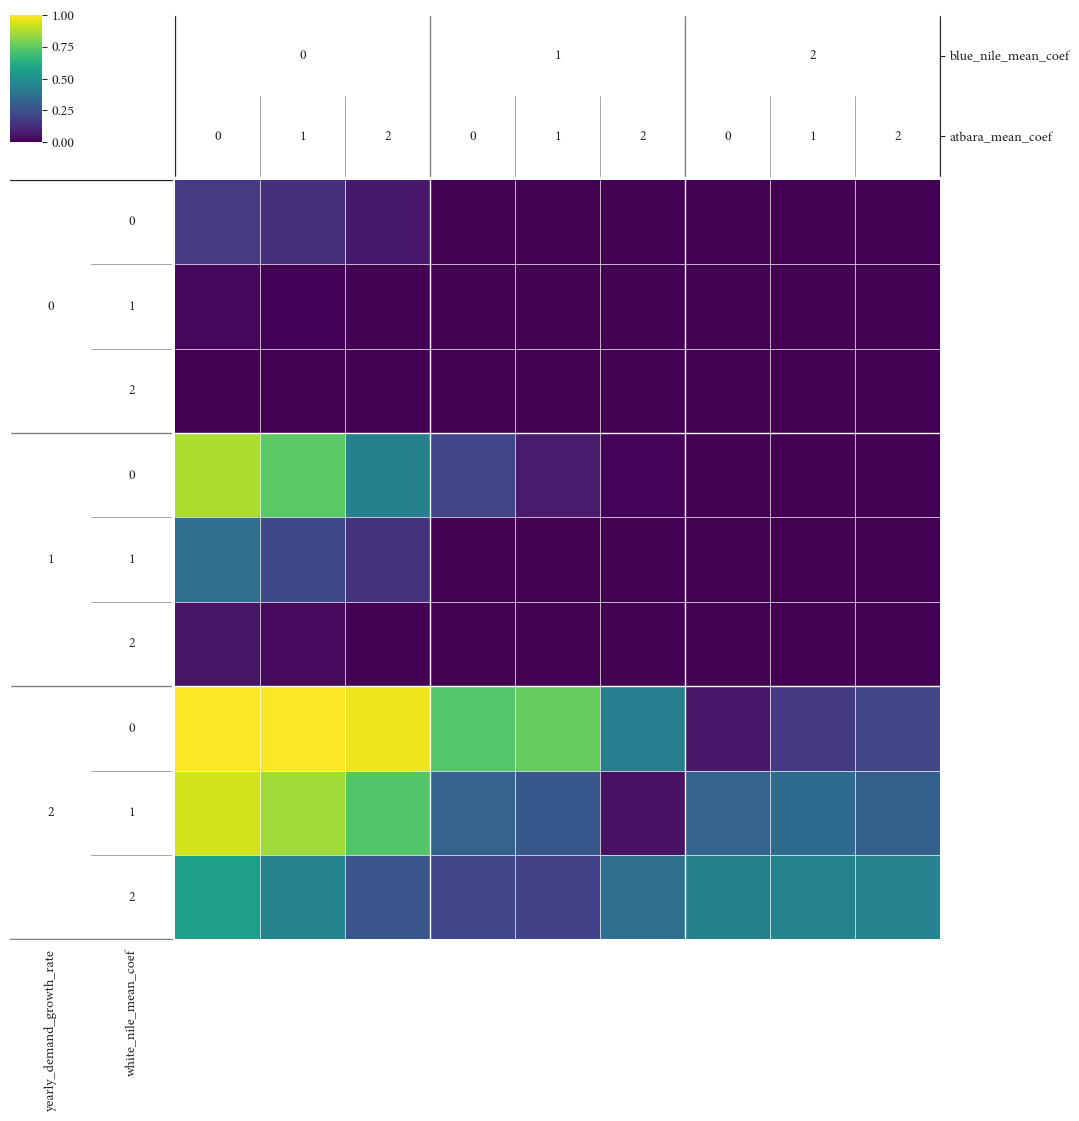

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


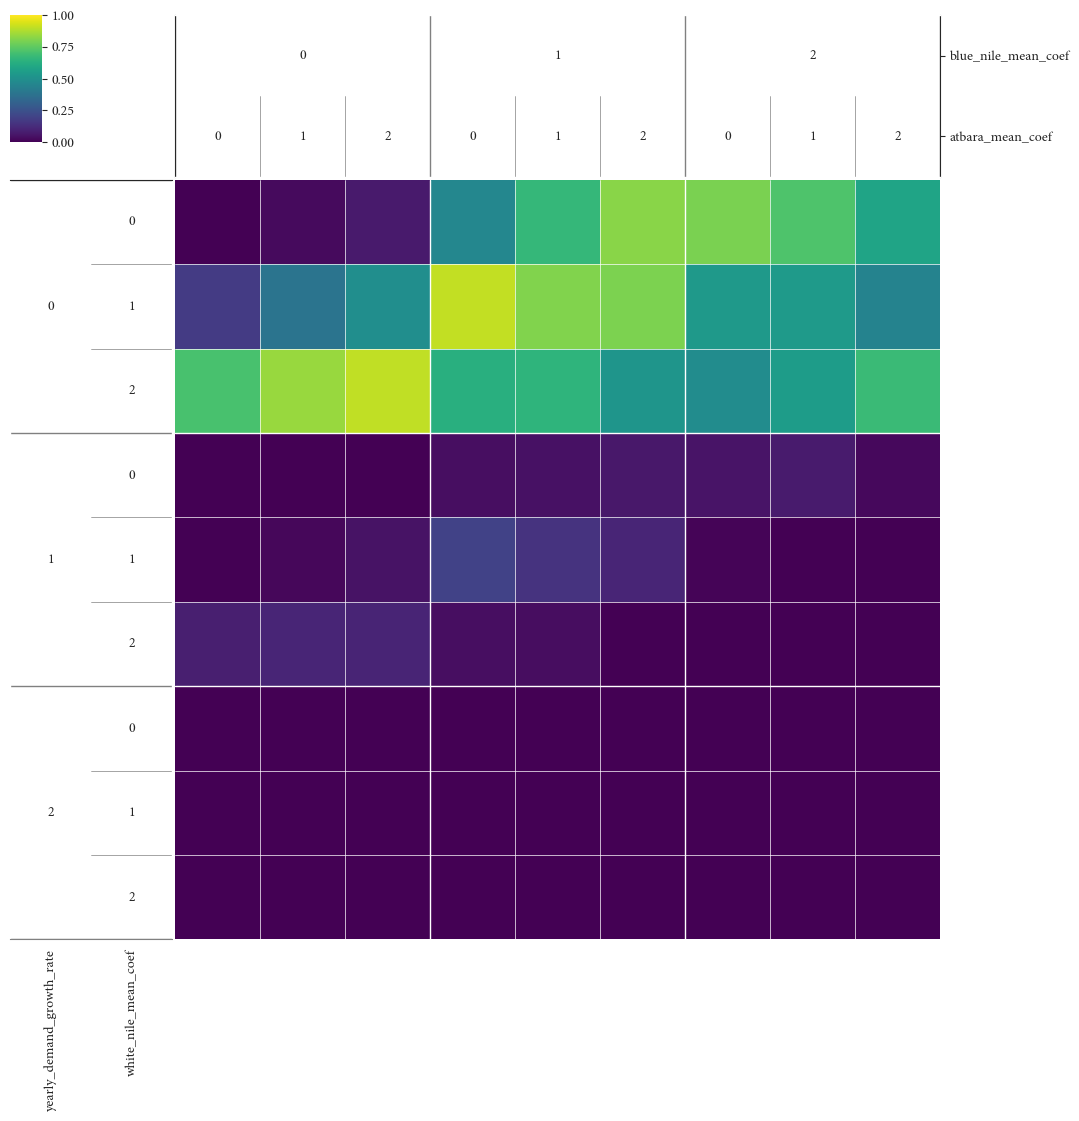

------------
egypt_low_had
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


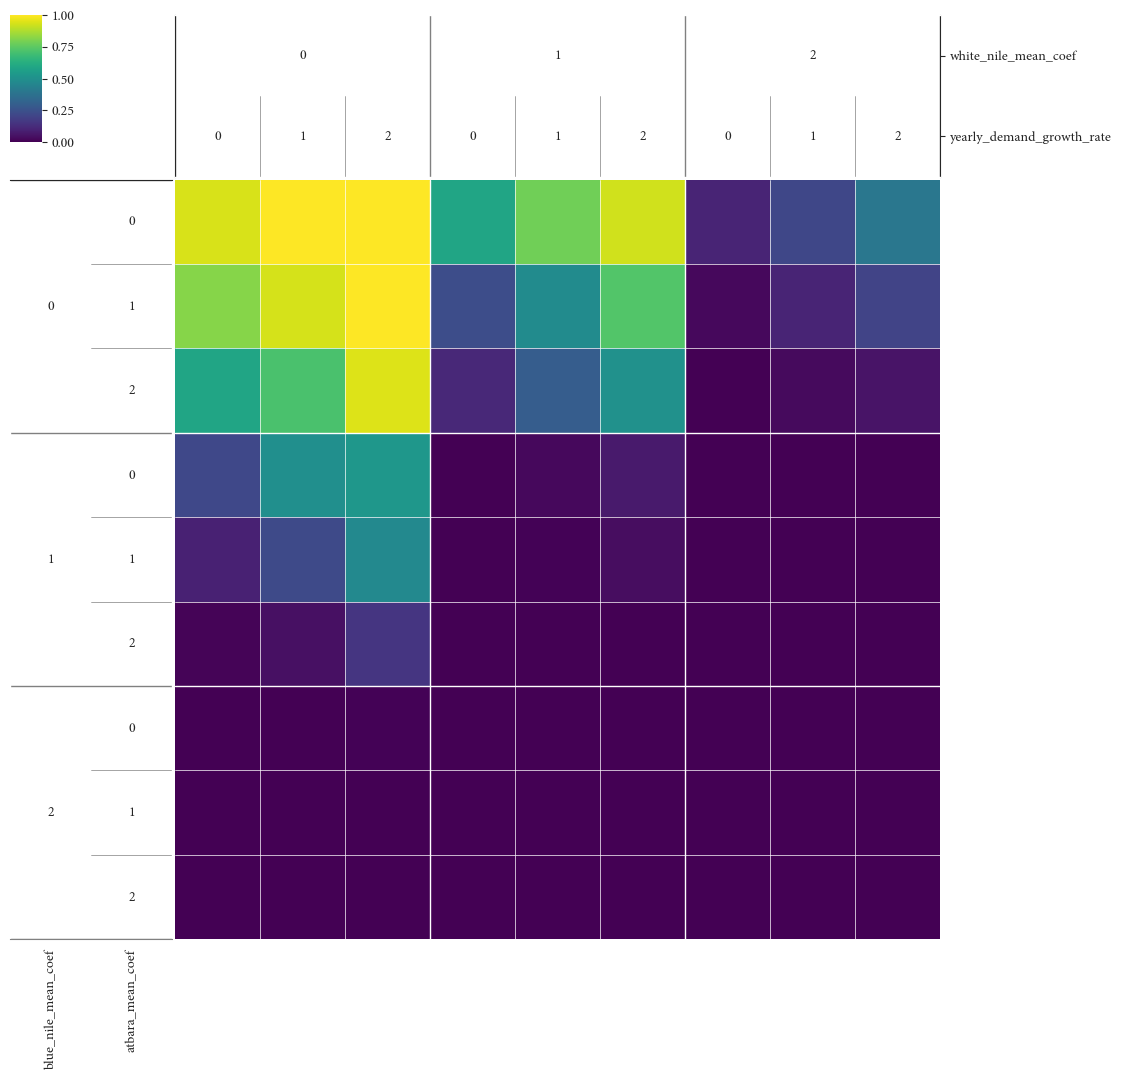

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


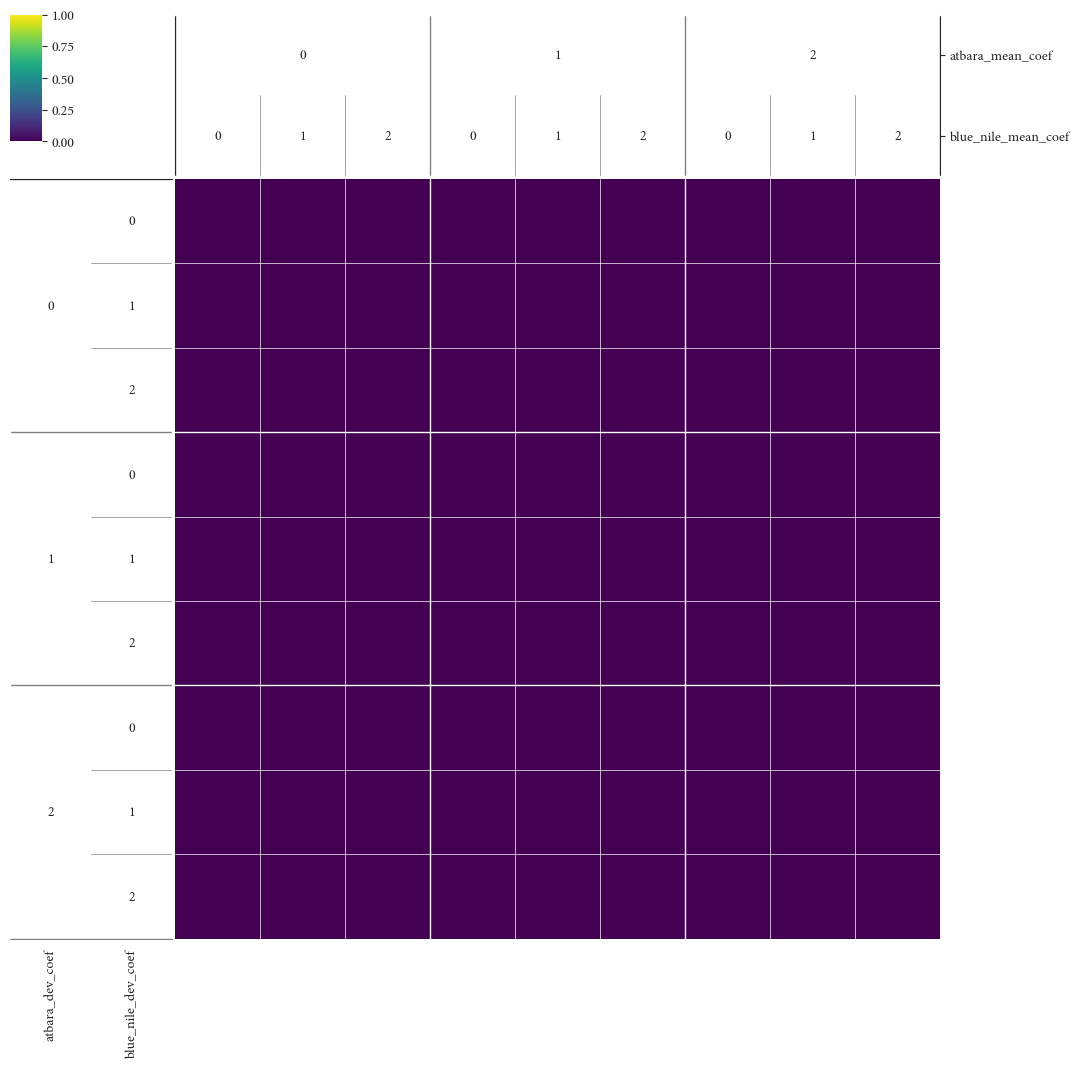

------------
sudan_irr
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


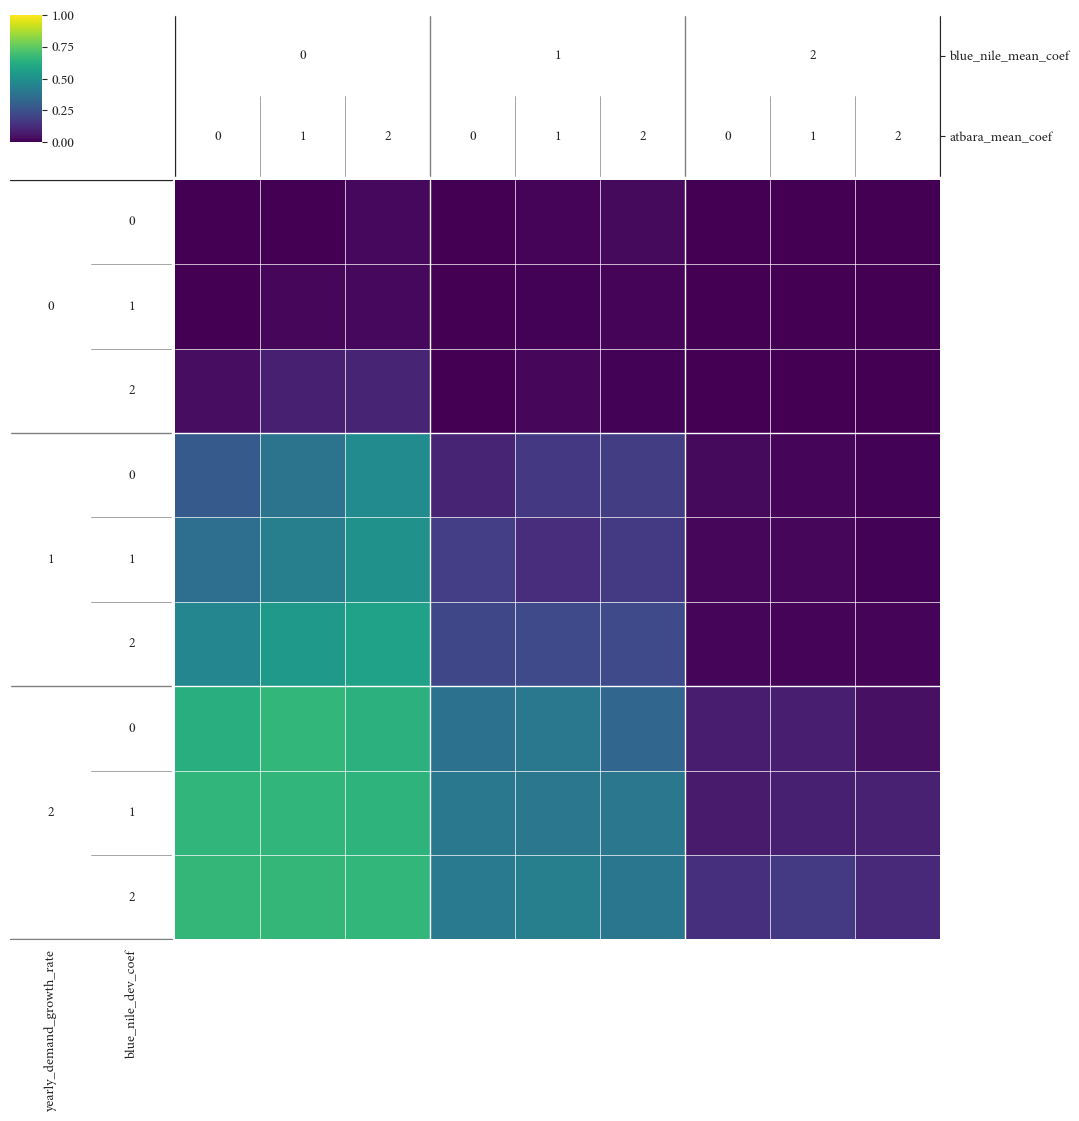

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


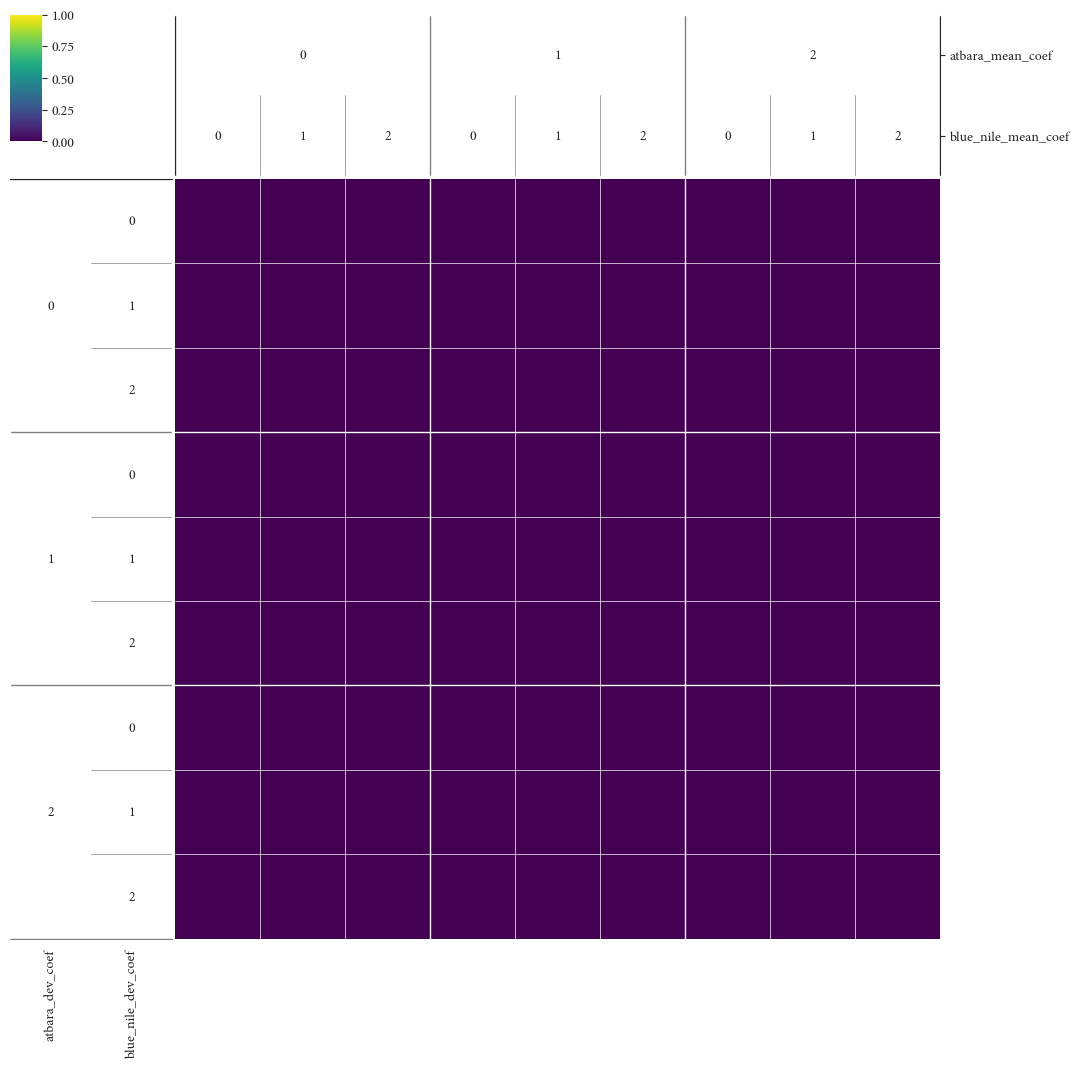

------------
sudan_90
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


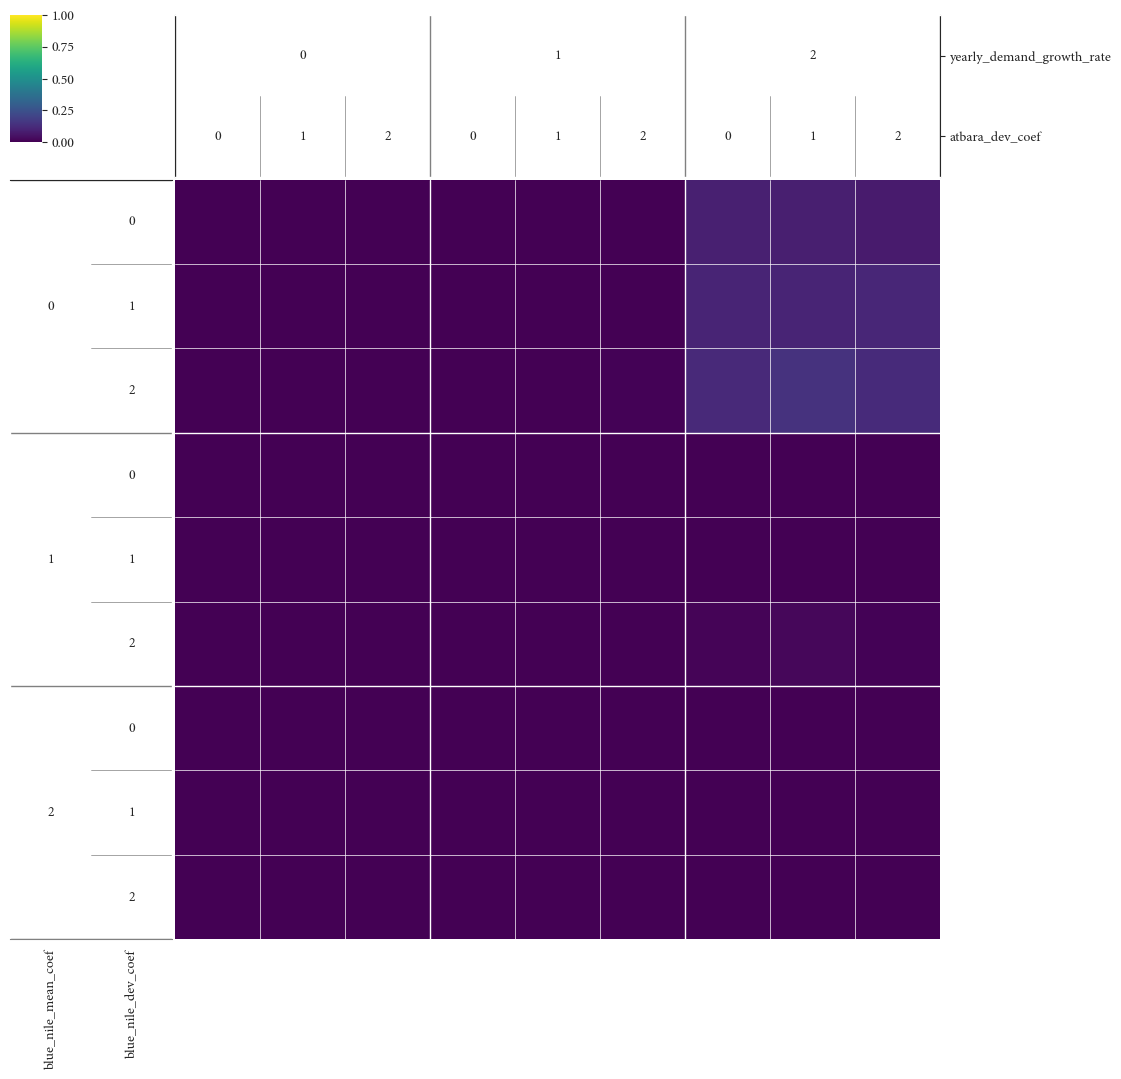

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


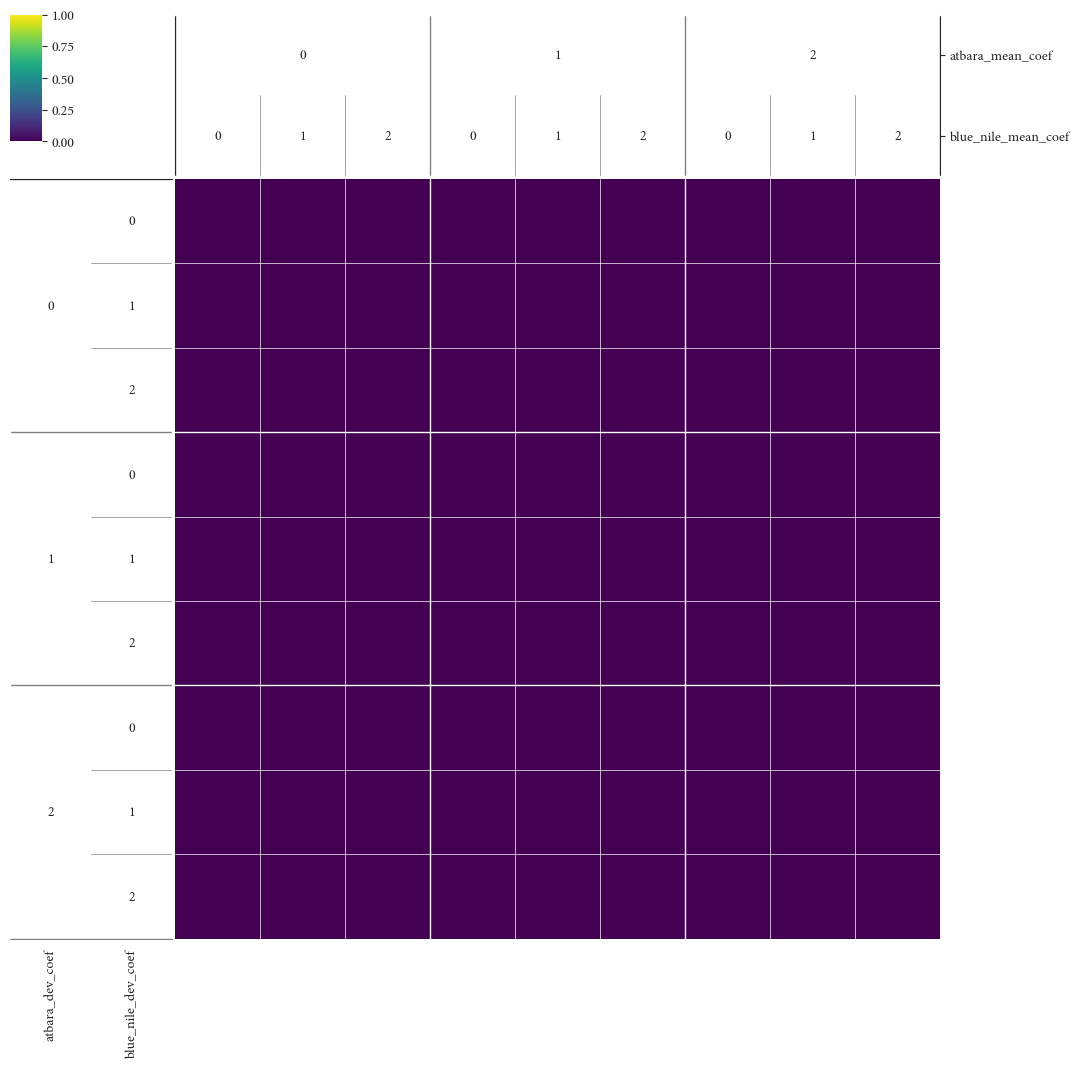

------------
ethiopia_hydro
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


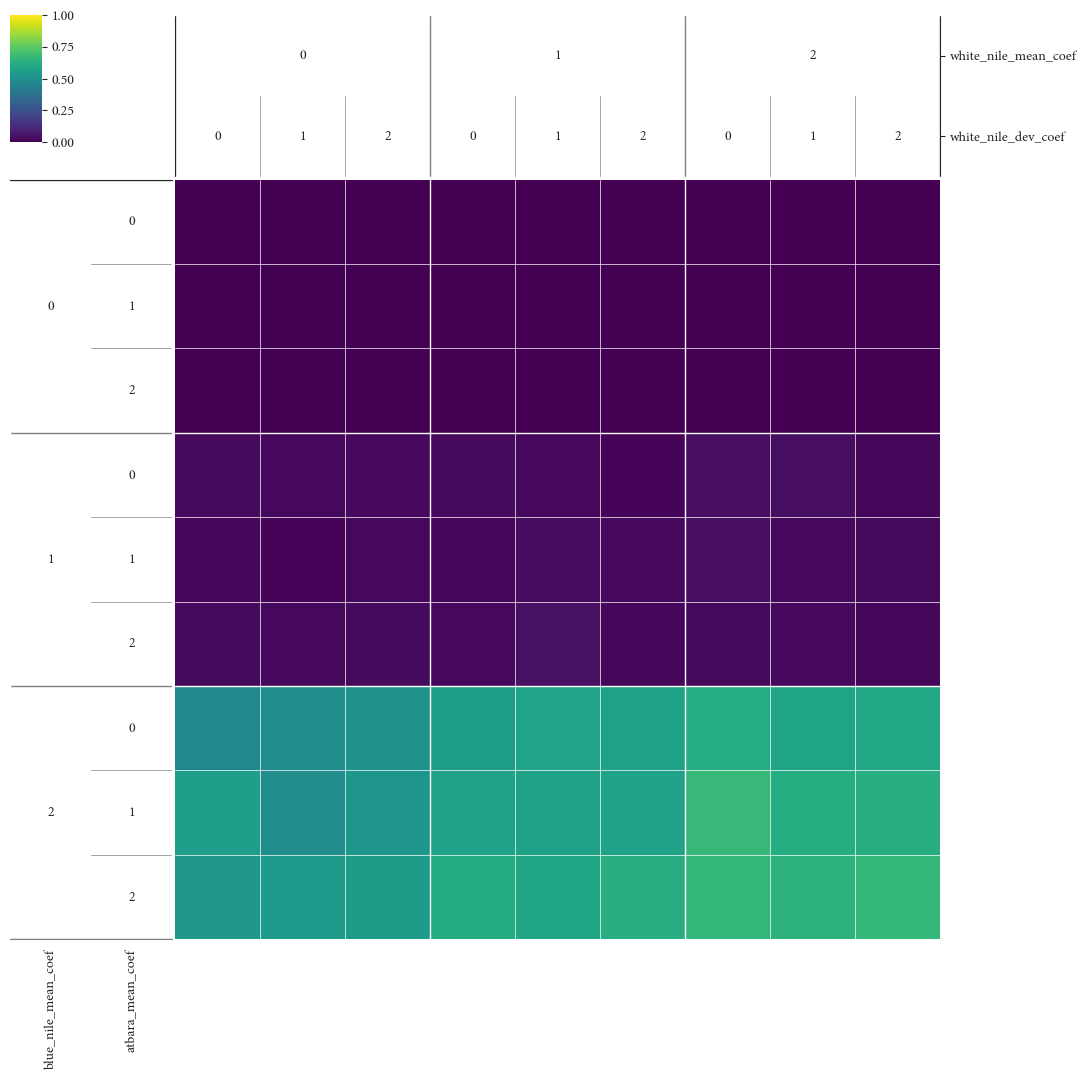

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


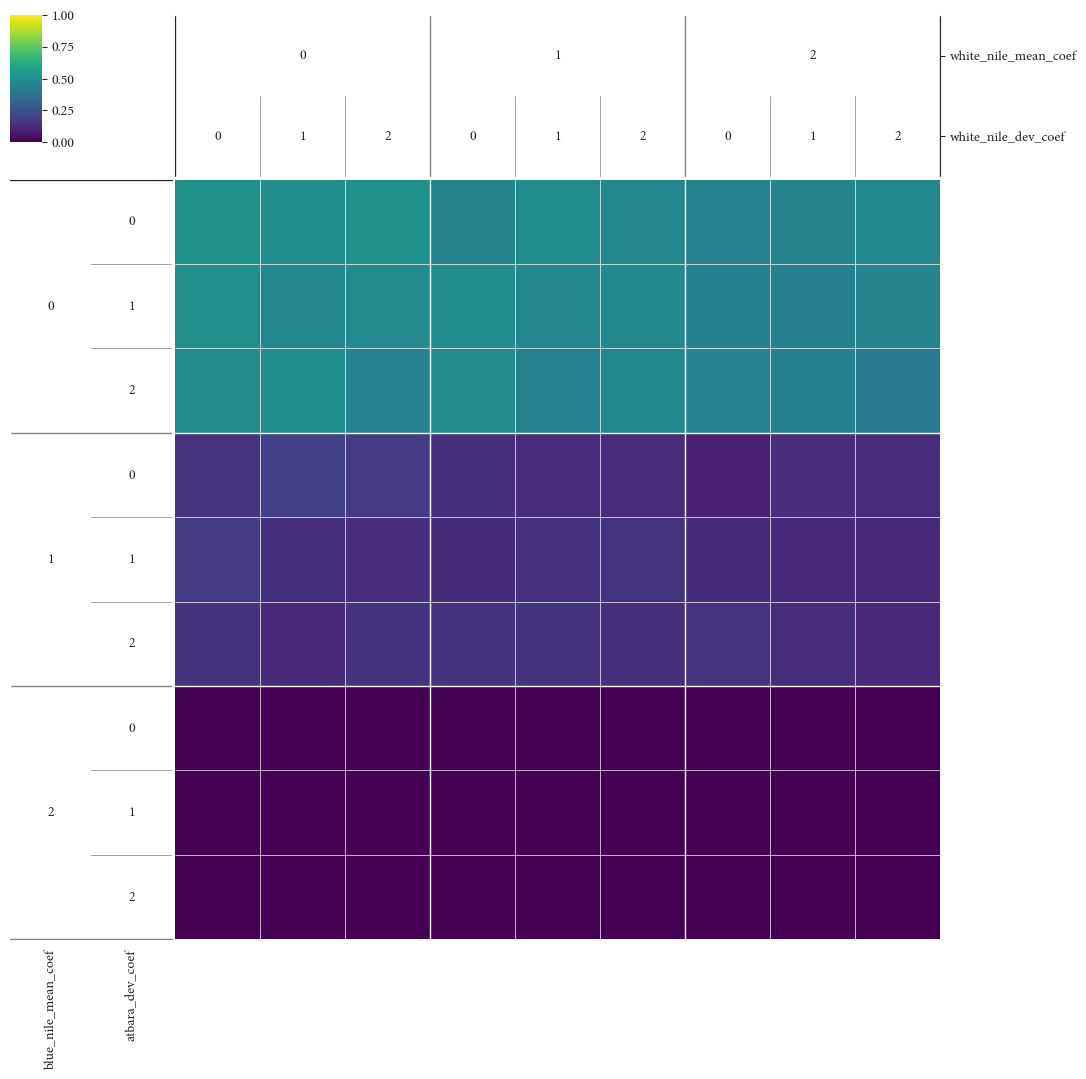

In [28]:
x = experiments.iloc[:, :7]

for i, obj in enumerate(outcomes.iloc[:, :-1].columns):
    print("------------")
    print(obj)
    print("------------\n")
    print("Bigger than 80th")
    y = outcomes[obj] > np.percentile(outcomes[obj], 80)
    dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12, 12))
    plt.show()
    print("Smaller than 20th")
    y = outcomes[obj] < np.percentile(outcomes[obj], 20)
    dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12, 12))
    plt.show()

Let's check the robustness of policies by calculating the maximum regret metric across scenarios:

In [18]:
experiments

atbara_dev_coef  atbara_mean_coef  blue_nile_dev_coef  \
0                 1.47              0.80                1.39   
1                 0.57              1.03                0.66   
2                 0.63              0.79                1.30   
3                 1.20              0.98                1.47   
4                 0.57              1.21                0.66   
...                ...               ...                 ...   
29995             1.31              0.93                1.34   
29996             1.46              1.05                1.04   
29997             1.26              1.12                0.54   
29998             0.92              1.15                0.71   
29999             1.30              1.07                0.98   

       blue_nile_mean_coef  white_nile_dev_coef  white_nile_mean_coef  \
0                     1.11                 1.02                  0.98   
1                     0.94                 0.59                  0.87   
2                     1.24                 1.34                  1.22   
3                     1.17                 1.29                  1.20   
4                     0.96                 1.25                  1.05   
...                    ...                  ...                   ...   
29995                 0.96                 1.12                  1.04   
29996                 1.08                 0.96                  1.08   
29997                 0.97                 1.31                  0.76   
29998                 0.97                 1.16                  1.08   
29999                 0.79                 0.73                  0.90   

       yearly_demand_growth_rate   v0   v1   v2  ...  v157  v158  v159  v160  \
0                           0.02 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
1                           0.02 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
2                           0.02 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
3                           0.01 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
4                           0.02 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
...                          ...  ...  ...  ...  ...   ...   ...   ...   ...   
29995                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   
29996                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   
29997                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   
29998                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   
29999                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   

       v161  v162  v163  scenario                policy        model  
0      0.05  0.69  0.99         0  best_egypt_aggregate  NileProblem  
1      0.05  0.69  0.99         1  best_egypt_aggregate  NileProblem  
2      0.05  0.69  0.99         2  best_egypt_aggregate  NileProblem  
3      0.05  0.69  0.99         3  best_egypt_aggregate  NileProblem  
4      0.05  0.69  0.99         4  best_egypt_aggregate  NileProblem  
...     ...   ...   ...       ...                   ...          ...  
29995  0.06  0.71  1.00      4995  compromise_threshold  NileProblem  
29996  0.06  0.71  1.00      4996  compromise_threshold  NileProblem  
29997  0.06  0.71  1.00      4997  compromise_threshold  NileProblem  
29998  0.06  0.71  1.00      4998  compromise_threshold  NileProblem  
29999  0.06  0.71  1.00      4999  compromise_threshold  NileProblem  

[30000 rows x 174 columns]

In [19]:
outcomes

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  \
0           6.53      1.74           0.00       0.12      0.00   
1           8.77      2.33           0.36       0.10      0.00   
2           3.39      1.31           0.00       0.00      0.00   
3           0.56      0.10           0.00       0.00      0.00   
4           5.28      1.52           0.00       0.26      0.00   
...          ...       ...            ...        ...       ...   
29995       1.51      0.36           0.02       0.01      0.00   
29996       3.78      1.42           0.00       0.00      0.00   
29997       6.23      1.73           0.30       0.05      0.00   
29998       2.32      0.92           0.00       0.00      0.00   
29999       8.39      2.59           0.67       0.10      0.00   

       ethiopia_hydro                policy  
0               10.72  best_egypt_aggregate  
1                7.71  best_egypt_aggregate  
2               15.07  best_egypt_aggregate  
3               13.64  best_egypt_aggregate  
4                8.20  best_egypt_aggregate  
...               ...                   ...  
29995           10.39  compromise_threshold  
29996           13.22  compromise_threshold  
29997           10.04  compromise_threshold  
29998           11.32  compromise_threshold  
29999            7.06  compromise_threshold  

[30000 rows x 7 columns]

In [30]:
def calculate_max_regret(objective_vector, direction):
    if direction == "min":
        best = np.percentile(objective_vector, 10, interpolation="closest_observation")
        worst = max(objective_vector)
    elif direction == "max":
        best = np.percentile(objective_vector, 90, interpolation="closest_observation")
        worst = min(objective_vector)

    return abs(best - worst)

In [31]:
directions = ["min", "min", "min", "min", "min", "max"]
overall_scores = {}
for policy in np.unique(experiments["policy"]):
    scores = {}

    logical = outcomes["policy"] == policy

    for i, outcome in enumerate(outcomes.columns[:6]):
        value = outcomes[outcome][logical]
        regret = calculate_max_regret(value, directions[i])
        scores[outcome] = regret
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

<ipython-input-30-81daa5c04f96>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  best = np.percentile(objective_vector, 10, interpolation="closest_observation")
<ipython-input-30-81daa5c04f96>:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  best = np.percentile(objective_vector, 90, interpolation="closest_observation")


egypt_irr  egypt_90  egypt_low_had  sudan_irr  \
best_egypt_90              26.52      6.29           0.82       0.46   
best_egypt_HAD             25.92      5.60           0.84       0.65   
best_egypt_aggregate       26.53      6.19           0.82       0.53   
best_ethiopia              27.36      5.52           0.88       0.05   
compromise_percentile      27.37      5.40           0.87       0.00   
compromise_threshold       25.81      5.40           0.84       0.62   

                       sudan_90  ethiopia_hydro  
best_egypt_90              0.13            5.38  
best_egypt_HAD             0.13            8.86  
best_egypt_aggregate       0.00            8.35  
best_ethiopia              0.00            7.39  
compromise_percentile      0.00            7.85  
compromise_threshold       0.06            8.80

In [32]:
ordered_regret = scores.loc[
    [
        "best_egypt_aggregate",
        "best_egypt_90",
        "best_egypt_HAD",
        "best_ethiopia",
        "compromise_percentile",
        "compromise_threshold",
    ]
]

best_egypt_aggregate                       Best Egypt Irr
best_egypt_90                        Best Egypt 90$^{th}$
best_egypt_HAD                             Best Egypt HAD
best_ethiopia                    Best Ethiopia Hydropower
compromise_percentile    Compromise: Percentile Threshold
compromise_threshold       Compromise: Absolute Threshold
Name: Name, dtype: object


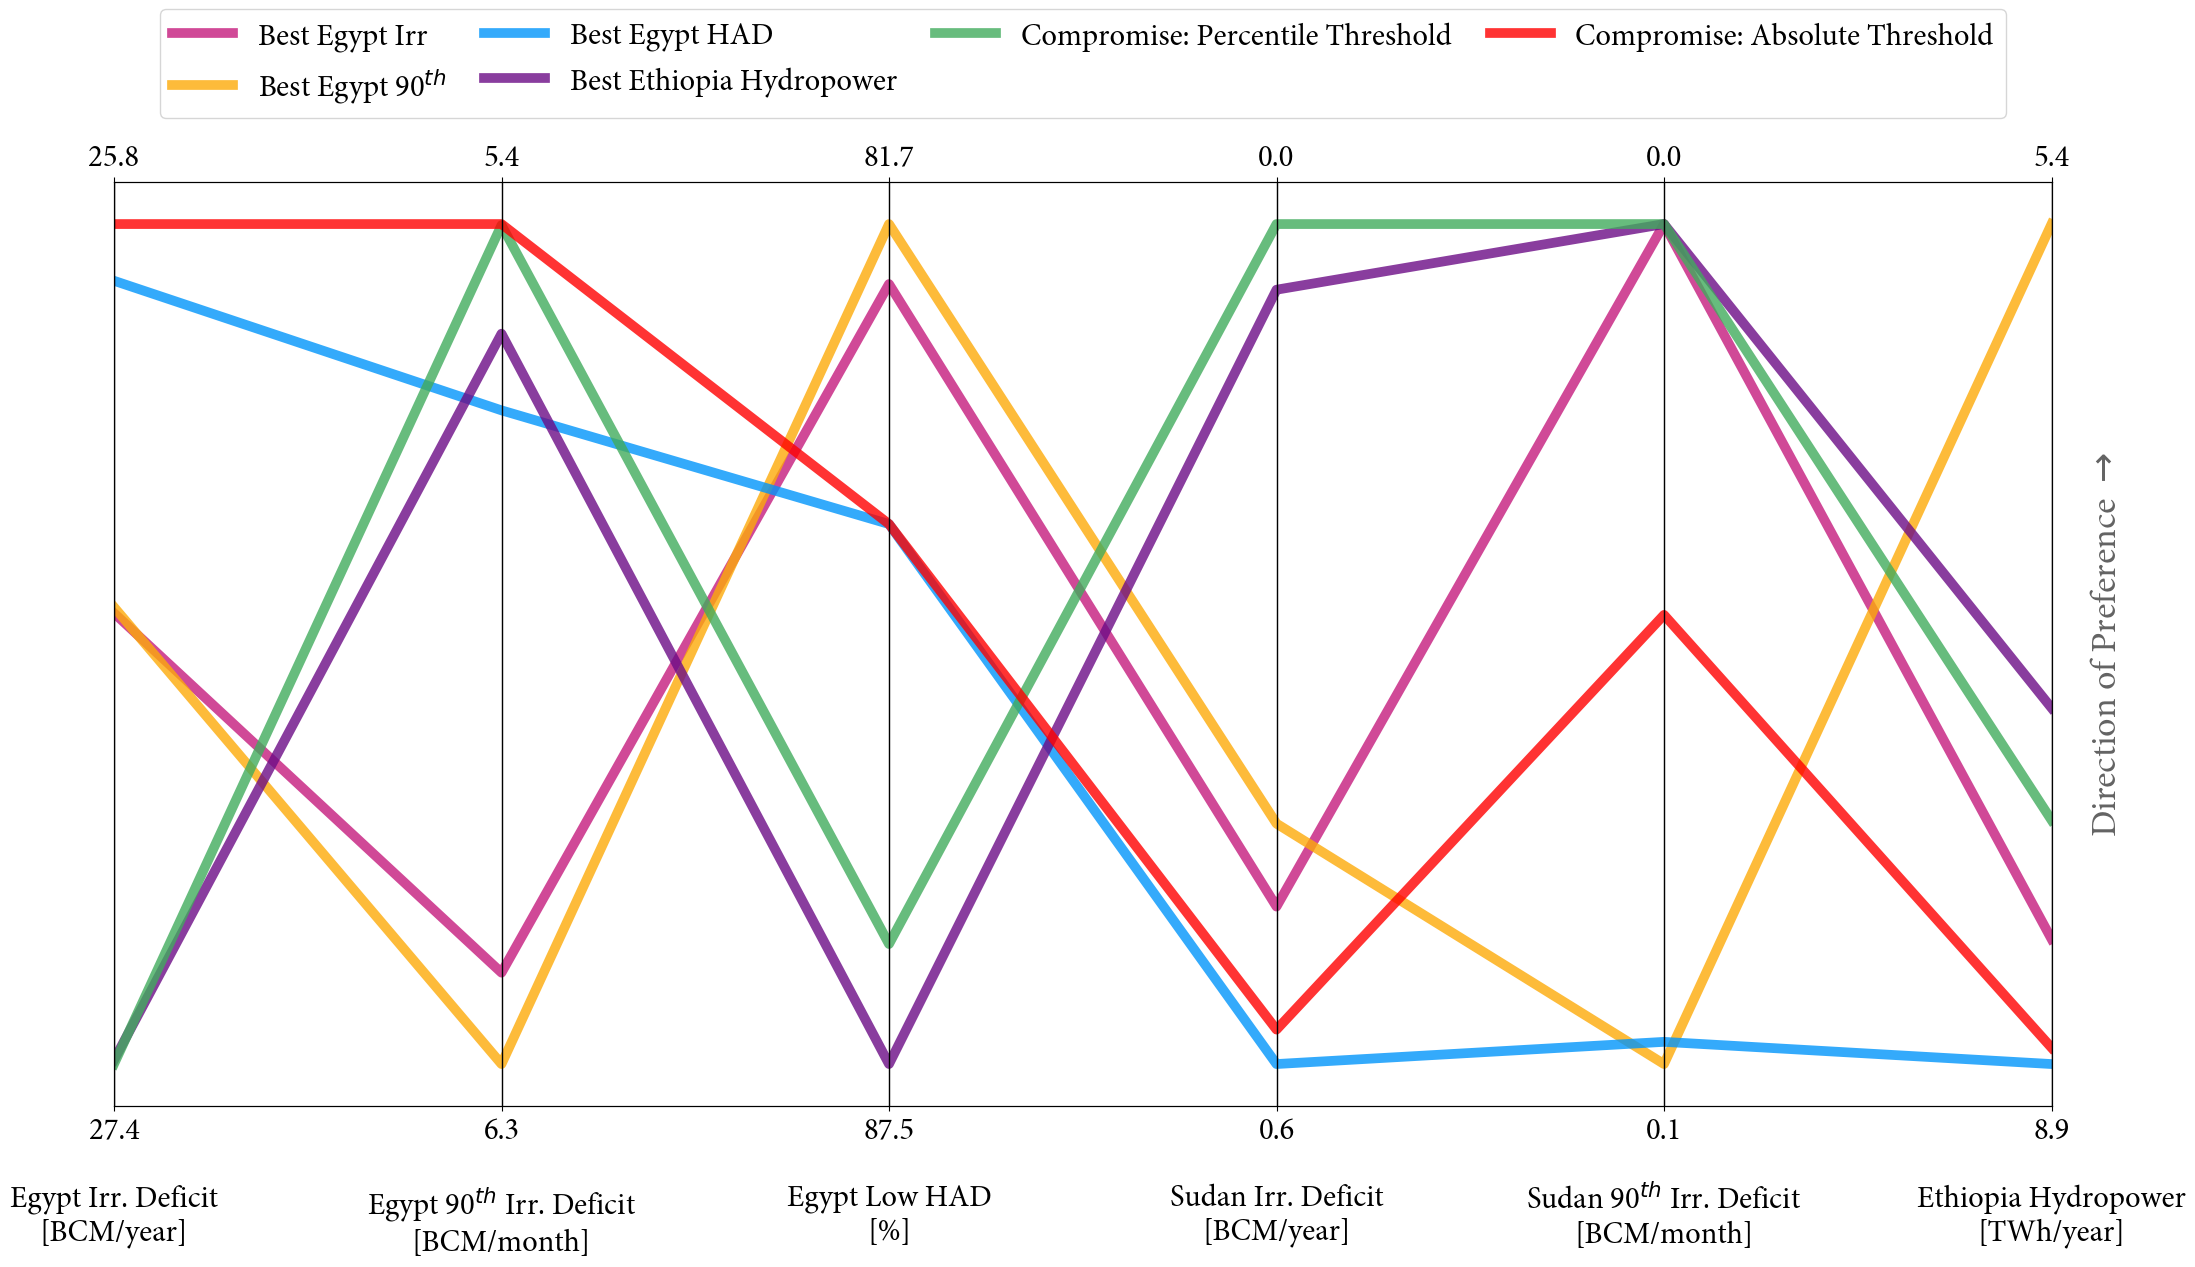

In [35]:
import importlib

importlib.reload(plotter)
from plotter import parallel_plots_few_policies

solution_names = [
    "Best Egypt Irr",
    "Best Egypt 90$^{th}$",
    "Best Egypt HAD",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile Threshold",
    "Compromise: Absolute Threshold",
]

parallel_plots_few_policies(ordered_regret, solution_names=solution_names)

In [36]:
experiments

atbara_dev_coef  atbara_mean_coef  blue_nile_dev_coef  \
0                 1.47              0.80                1.39   
1                 0.57              1.03                0.66   
2                 0.63              0.79                1.30   
3                 1.20              0.98                1.47   
4                 0.57              1.21                0.66   
...                ...               ...                 ...   
29995             1.31              0.93                1.34   
29996             1.46              1.05                1.04   
29997             1.26              1.12                0.54   
29998             0.92              1.15                0.71   
29999             1.30              1.07                0.98   

       blue_nile_mean_coef  white_nile_dev_coef  white_nile_mean_coef  \
0                     1.11                 1.02                  0.98   
1                     0.94                 0.59                  0.87   
2                     1.24                 1.34                  1.22   
3                     1.17                 1.29                  1.20   
4                     0.96                 1.25                  1.05   
...                    ...                  ...                   ...   
29995                 0.96                 1.12                  1.04   
29996                 1.08                 0.96                  1.08   
29997                 0.97                 1.31                  0.76   
29998                 0.97                 1.16                  1.08   
29999                 0.79                 0.73                  0.90   

       yearly_demand_growth_rate   v0   v1   v2  ...  v157  v158  v159  v160  \
0                           0.02 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
1                           0.02 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
2                           0.02 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
3                           0.01 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
4                           0.02 0.03 0.43 0.39  ...  0.22 -0.72  0.87  0.95   
...                          ...  ...  ...  ...  ...   ...   ...   ...   ...   
29995                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   
29996                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   
29997                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   
29998                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   
29999                       0.02 0.04 0.47 0.43  ...  0.24 -0.72  0.87  0.93   

       v161  v162  v163  scenario                policy        model  
0      0.05  0.69  0.99         0  best_egypt_aggregate  NileProblem  
1      0.05  0.69  0.99         1  best_egypt_aggregate  NileProblem  
2      0.05  0.69  0.99         2  best_egypt_aggregate  NileProblem  
3      0.05  0.69  0.99         3  best_egypt_aggregate  NileProblem  
4      0.05  0.69  0.99         4  best_egypt_aggregate  NileProblem  
...     ...   ...   ...       ...                   ...          ...  
29995  0.06  0.71  1.00      4995  compromise_threshold  NileProblem  
29996  0.06  0.71  1.00      4996  compromise_threshold  NileProblem  
29997  0.06  0.71  1.00      4997  compromise_threshold  NileProblem  
29998  0.06  0.71  1.00      4998  compromise_threshold  NileProblem  
29999  0.06  0.71  1.00      4999  compromise_threshold  NileProblem  

[30000 rows x 174 columns]

In [37]:
outcomes

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  \
0           6.53      1.74           0.00       0.12      0.00   
1           8.77      2.33           0.36       0.10      0.00   
2           3.39      1.31           0.00       0.00      0.00   
3           0.56      0.10           0.00       0.00      0.00   
4           5.28      1.52           0.00       0.26      0.00   
...          ...       ...            ...        ...       ...   
29995       1.51      0.36           0.02       0.01      0.00   
29996       3.78      1.42           0.00       0.00      0.00   
29997       6.23      1.73           0.30       0.05      0.00   
29998       2.32      0.92           0.00       0.00      0.00   
29999       8.39      2.59           0.67       0.10      0.00   

       ethiopia_hydro                policy  
0               10.72  best_egypt_aggregate  
1                7.71  best_egypt_aggregate  
2               15.07  best_egypt_aggregate  
3               13.64  best_egypt_aggregate  
4                8.20  best_egypt_aggregate  
...               ...                   ...  
29995           10.39  compromise_threshold  
29996           13.22  compromise_threshold  
29997           10.04  compromise_threshold  
29998           11.32  compromise_threshold  
29999            7.06  compromise_threshold  

[30000 rows x 7 columns]

In [ ]:
x = experiments.iloc[:, :7]

for i, obj in enumerate(outcomes.iloc[:, :-1].columns):
    print("------------")
    print(obj)
    print("------------\n")
    print("Bigger than 80th")
    y = outcomes[obj] > np.percentile(outcomes[obj], 80)
    dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12, 12))
    plt.show()
    print("Smaller than 20th")
    y = outcomes[obj] < np.percentile(outcomes[obj], 20)
    dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12, 12))
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


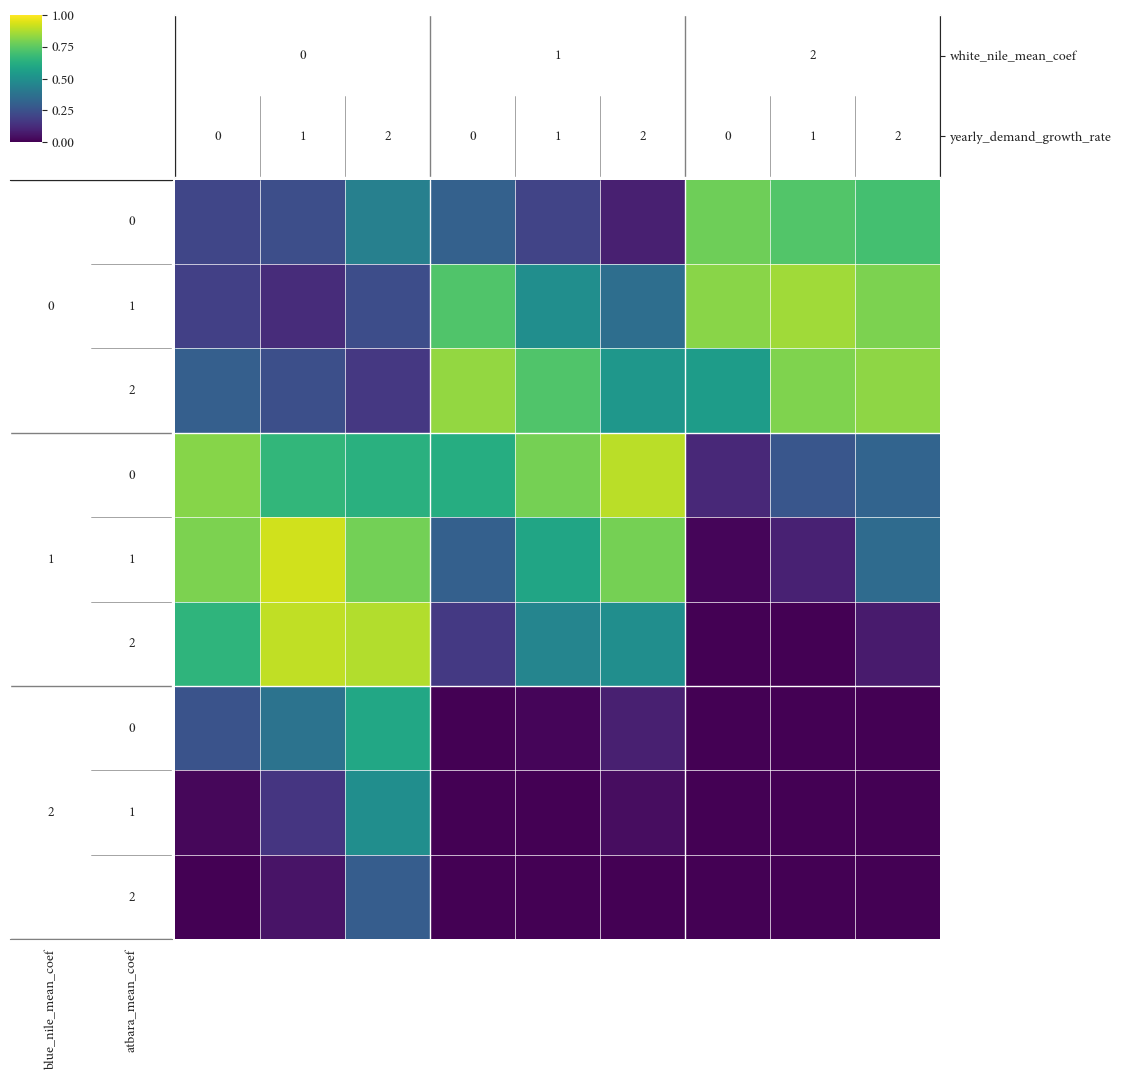

In [54]:
obj = "egypt_low_had"
x = experiments.iloc[:5000, [1,3,5,6]]
y = outcomes.loc[outcomes["policy"] == "best_ethiopia",obj].reset_index(drop=True) > outcomes.loc[outcomes["policy"] == "compromise_percentile",obj].reset_index(drop=True)
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12, 12))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


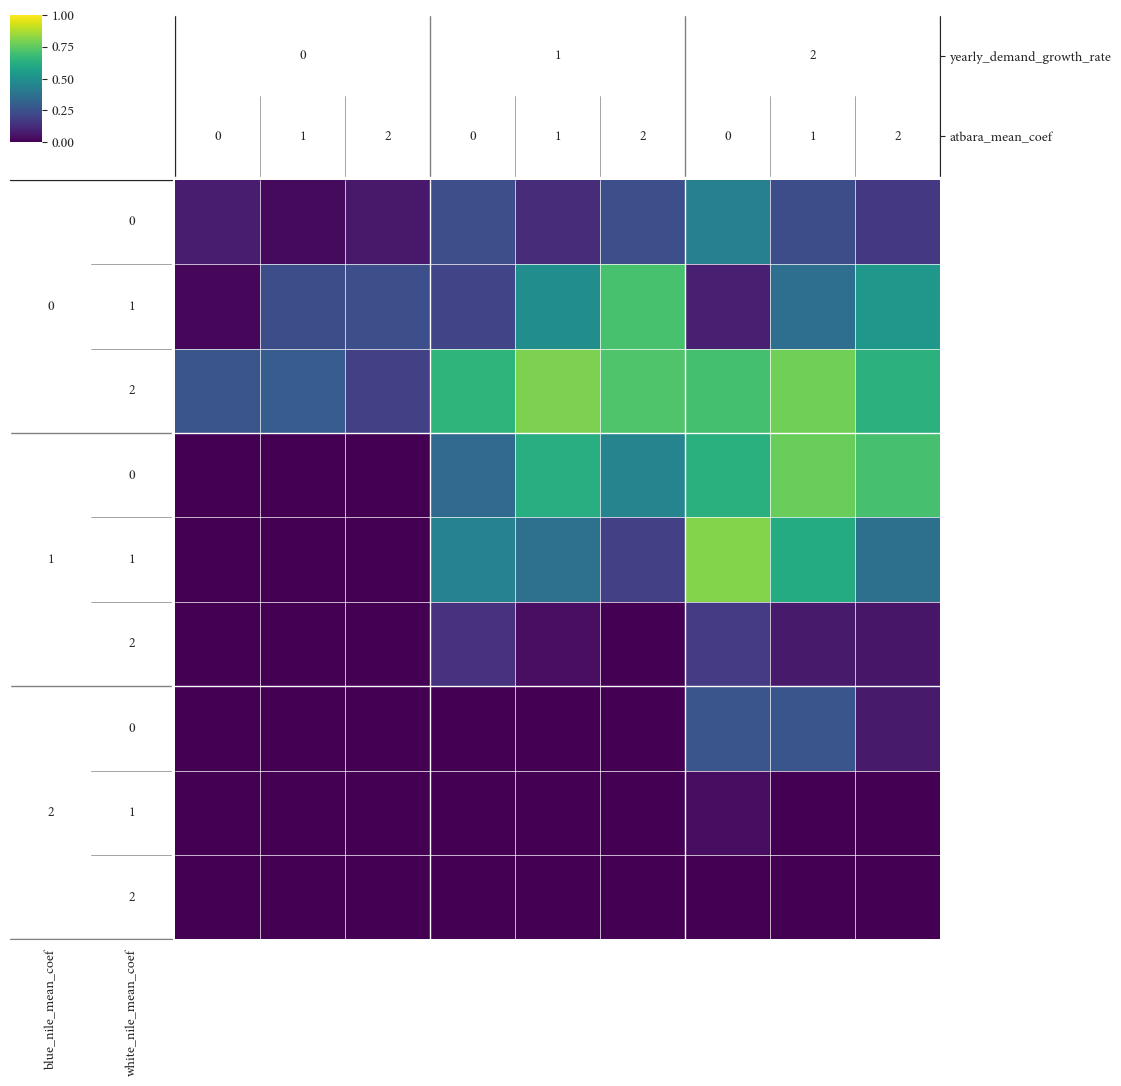

In [79]:
#obj = "egypt_low_had"
x = experiments.iloc[:5000, [1,3,5,6]]
y = pd.Series(np.repeat(0, 5000))
for obj in outcomes.iloc[:, :-1].columns:
    y = y + (outcomes.loc[outcomes["policy"] == "best_ethiopia",obj].reset_index(drop=True) > outcomes.loc[outcomes["policy"] == "compromise_percentile",obj].reset_index(drop=True))
y = y == 5
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12, 12))
plt.show()

In [55]:
type(outcomes.loc[outcomes["policy"] == "best_ethiopia",obj].reset_index(drop=True))

pandas.core.series.Series

In [ ]:
outcomes.loc[outcomes["policy"] == "best_ethiopia",obj].reset_index

In [62]:
True*False

0

In [80]:
outcomes["scenario"] = experiments["scenario"]

In [131]:
pd.sort?

Object `pd.sort` not found.


In [145]:
from collections import defaultdict
from tqdm import tqdm
directions = ["min", "min", "min", "min", "min", "max"]
best_performer_df = pd.DataFrame(range(5000),columns=['Scenario'])
best_performer_df["Blue Nile Mean Flow Coefficient"] = experiments["blue_nile_mean_coef"][:5000]
best_performer_df["Yearly Demand Growth Rate"] = experiments["yearly_demand_growth_rate"][:5000]

performers = defaultdict(list)
improvements = defaultdict(list)
for scen in tqdm(range(5000)):
    scen_df = outcomes.loc[outcomes.scenario == scen].copy()
    for i, obj in enumerate(outcomes.iloc[:, :-2].columns):
        best, second_best = (scen_df.sort_values(by=[obj], ascending=(directions[i]=="min")).iloc[0:2][obj])
        policy = list(scen_df.loc[scen_df[obj] == best, "policy"])[0]
        improvement = abs(best - second_best)
        performers[obj].append(policy)
        improvements[obj].append(improvement)
        
for obj in outcomes.iloc[:, :-2].columns:     
    best_performer_df[obj] = performers[obj]
    best_performer_df[f"{obj}_improvement"] = improvements[obj]
        

100%|██████████| 5000/5000 [00:10<00:00, 469.54it/s]


In [147]:
best_performer_df.egypt_90.unique()

array(['best_egypt_90', 'best_egypt_aggregate', 'compromise_threshold',
       'best_egypt_HAD', 'compromise_percentile', 'best_ethiopia'],
      dtype=object)

In [148]:
best_performer_df.describe()

Scenario  Blue Nile Mean Flow Coefficient  Yearly Demand Growth Rate  \
count   5000.00                          5000.00                    5000.00   
mean    2499.50                             1.00                       0.02   
std     1443.52                             0.14                       0.01   
min        0.00                             0.75                       0.01   
25%     1249.75                             0.87                       0.02   
50%     2499.50                             1.00                       0.02   
75%     3749.25                             1.12                       0.02   
max     4999.00                             1.25                       0.03   

       egypt_irr_improvement  egypt_90_improvement  egypt_low_had_improvement  \
count                5000.00               5000.00                    5000.00   
mean                    0.26                  0.10                       0.02   
std                     0.20                  0.09                       0.02   
min                     0.00                  0.00                       0.00   
25%                     0.08                  0.02                       0.00   
50%                     0.22                  0.07                       0.00   
75%                     0.43                  0.15                       0.02   
max                     0.87                  0.37                       0.16   

       sudan_irr_improvement  sudan_90_improvement  ethiopia_hydro_improvement  
count                5000.00               5000.00                     5000.00  
mean                    0.00                  0.00                        0.40  
std                     0.00                  0.00                        0.22  
min                     0.00                  0.00                        0.02  
25%                     0.00                  0.00                        0.19  
50%                     0.00                  0.00                        0.51  
75%                     0.00                  0.00                        0.59  
max                     0.05                  0.00                        0.70

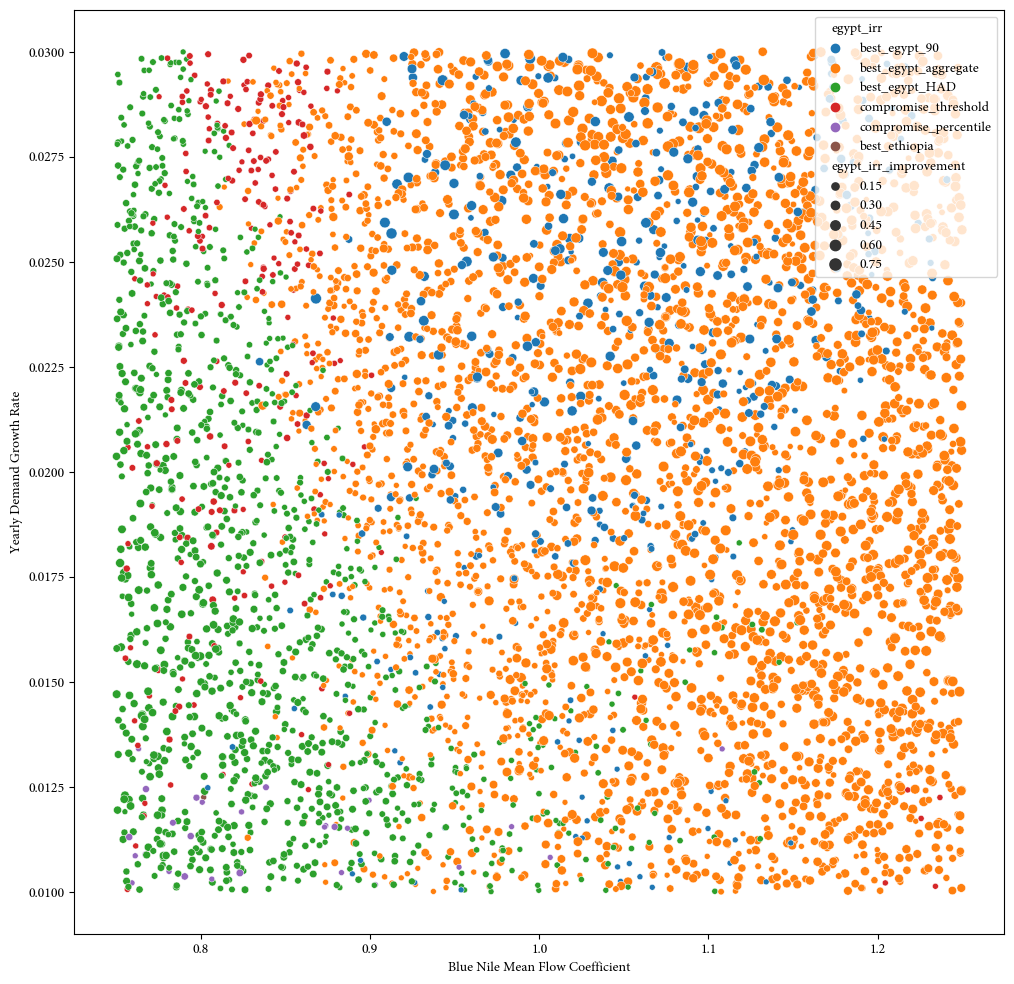

In [183]:
obj="egypt_irr"
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data = best_performer_df[best_performer_df[f"{obj}_improvement"]>0],
                x= "Blue Nile Mean Flow Coefficient",
                y= "Yearly Demand Growth Rate", 
                hue=obj,
                size=f"{obj}_improvement",
                ax=ax)
plt.show()

5000it [00:23, 210.52it/s]


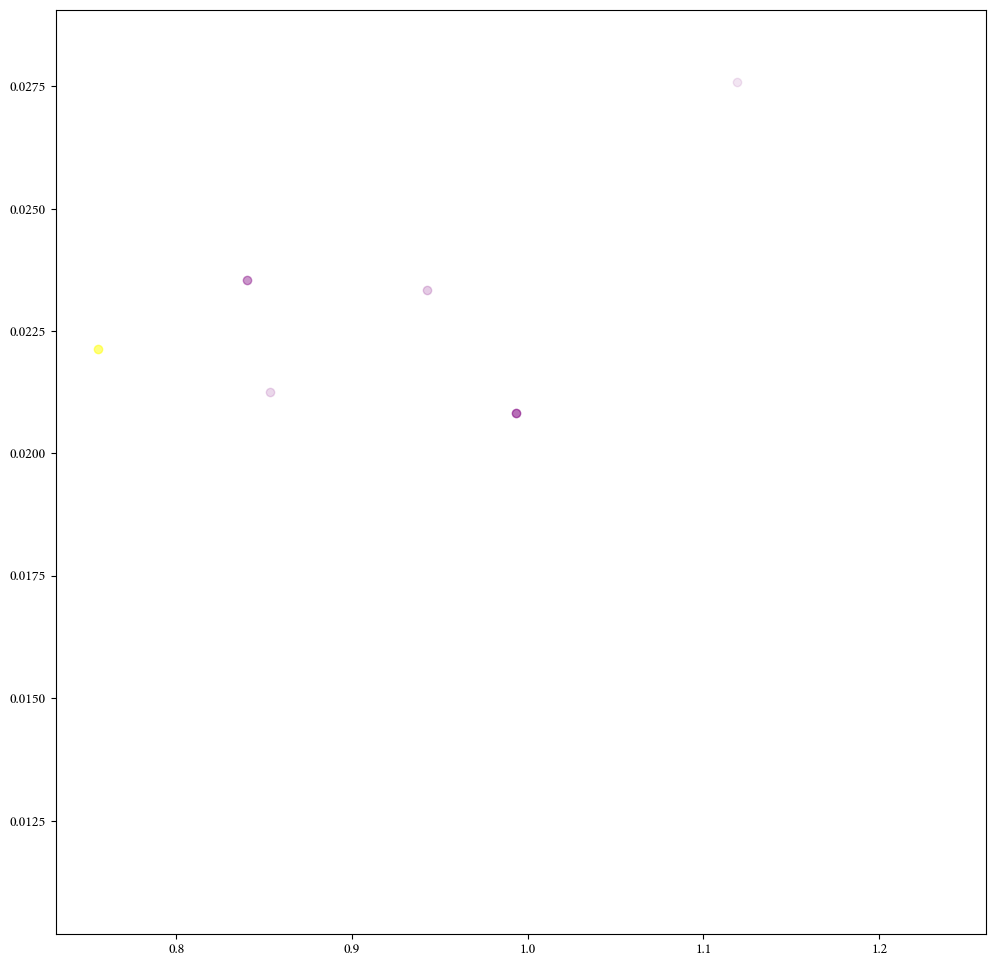

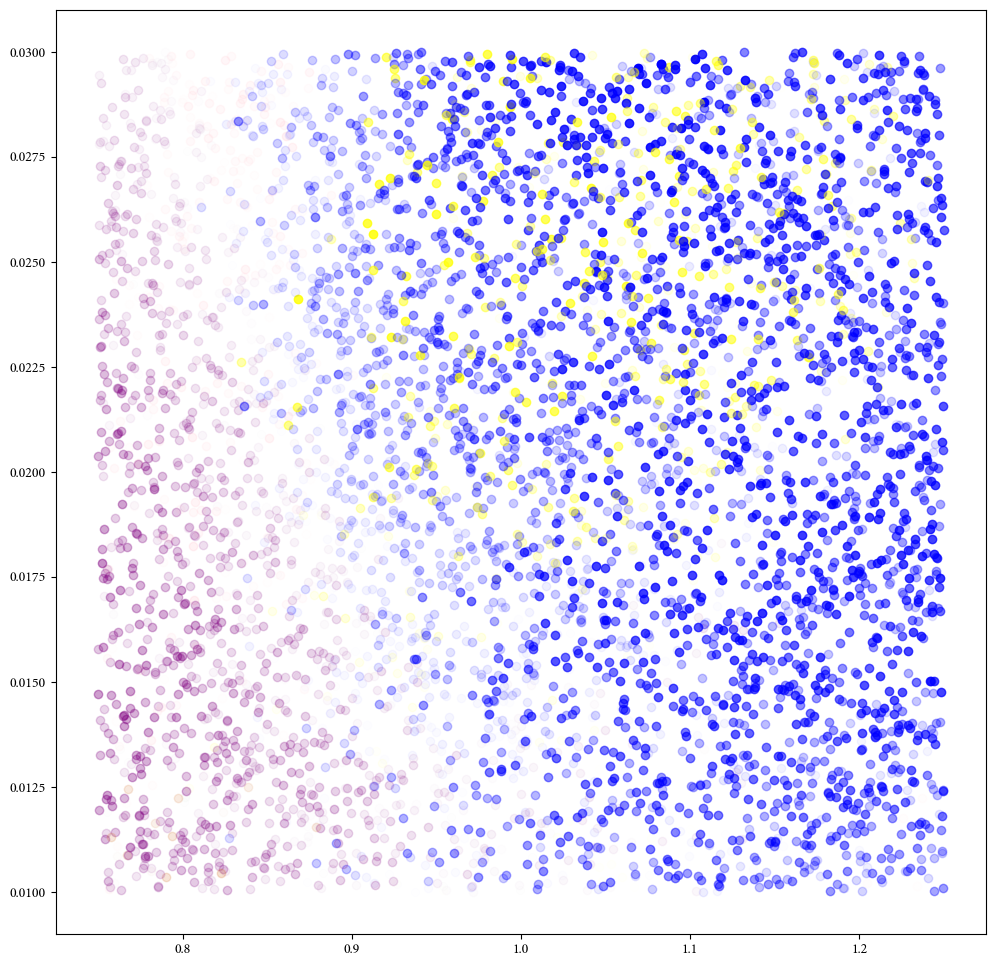

In [193]:
color_dict = {"best_egypt_90":"yellow","best_egypt_aggregate":"blue","best_egypt_HAD":"purple","compromise_threshold":"pink","compromise_percentile":"chocolate","best_ethiopia":"green"}
obj="egypt_irr"
best_imp = best_performer_df[f"{obj}_improvement"].max()
fig, ax = plt.subplots(figsize=(12,12))

for _, row in tqdm(best_performer_df.iterrows()):
    ax.scatter(#data = row,
                    x= row["Blue Nile Mean Flow Coefficient"],
                    y= row["Yearly Demand Growth Rate"], 
                    label=row[obj],
                    alpha=row[f"{obj}_improvement"]*(1/best_imp),
                    color=color_dict[row[obj]])
                    #ax=ax)
plt.show()

In [96]:
outcomes.loc[outcomes.scenario==1].loc[outcomes.sudan_90==0]
    

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  \
1           8.77      2.33           0.36       0.10      0.00   
5001       10.11      3.02           0.33       0.07      0.00   
10001       9.17      2.40           0.30       0.02      0.00   
15001      10.21      2.66           0.51       0.00      0.00   
20001       9.70      2.39           0.47       0.00      0.00   
25001       9.02      2.48           0.32       0.14      0.00   

       ethiopia_hydro                 policy  scenario  
1                7.71   best_egypt_aggregate         1  
5001             6.82          best_egypt_90         1  
10001           10.19         best_egypt_HAD         1  
15001           12.26          best_ethiopia         1  
20001           11.60  compromise_percentile         1  
25001            9.68   compromise_threshold         1

In [97]:
from collections import defaultdict
defaultdict?

Init signature: defaultdict(self, /, *args, **kwargs)
Docstring:     
defaultdict(default_factory=None, /, [...]) --> dict with default factory

The default factory is called without arguments to produce
a new value when a key is not present, in __getitem__ only.
A defaultdict compares equal to a dict with the same items.
All remaining arguments are treated the same as if they were
passed to the dict constructor, including keyword arguments.
File:           /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/collections/__init__.py
Type:           type
Subclasses:     Quoter


In [187]:
best_performer_df

Scenario  Blue Nile Mean Flow Coefficient  Yearly Demand Growth Rate  \
0            0                             1.11                       0.02   
1            1                             0.94                       0.02   
2            2                             1.24                       0.02   
3            3                             1.17                       0.01   
4            4                             0.96                       0.02   
...        ...                              ...                        ...   
4995      4995                             0.96                       0.02   
4996      4996                             1.08                       0.02   
4997      4997                             0.97                       0.02   
4998      4998                             0.97                       0.02   
4999      4999                             0.79                       0.02   

                 egypt_irr  egypt_irr_improvement              egypt_90  \
0            best_egypt_90                   0.45         best_egypt_90   
1     best_egypt_aggregate                   0.25  best_egypt_aggregate   
2     best_egypt_aggregate                   0.37  compromise_threshold   
3     best_egypt_aggregate                   0.21  best_egypt_aggregate   
4            best_egypt_90                   0.55         best_egypt_90   
...                    ...                    ...                   ...   
4995  best_egypt_aggregate                   0.13         best_egypt_90   
4996  best_egypt_aggregate                   0.50  best_egypt_aggregate   
4997  best_egypt_aggregate                   0.35  best_egypt_aggregate   
4998  best_egypt_aggregate                   0.03  best_egypt_aggregate   
4999        best_egypt_HAD                   0.16        best_egypt_HAD   

      egypt_90_improvement         egypt_low_had  egypt_low_had_improvement  \
0                     0.12  best_egypt_aggregate                       0.00   
1                     0.06        best_egypt_HAD                       0.02   
2                     0.03  best_egypt_aggregate                       0.00   
3                     0.02  best_egypt_aggregate                       0.00   
4                     0.22  best_egypt_aggregate                       0.00   
...                    ...                   ...                        ...   
4995                  0.05        best_egypt_HAD                       0.01   
4996                  0.31  best_egypt_aggregate                       0.00   
4997                  0.16        best_egypt_HAD                       0.01   
4998                  0.04  best_egypt_aggregate                       0.00   
4999                  0.07         best_egypt_90                       0.04   

                  sudan_irr  sudan_irr_improvement              sudan_90  \
0            best_egypt_HAD                   0.00  best_egypt_aggregate   
1     compromise_percentile                   0.00  best_egypt_aggregate   
2      best_egypt_aggregate                   0.00  best_egypt_aggregate   
3      best_egypt_aggregate                   0.00  best_egypt_aggregate   
4            best_egypt_HAD                   0.00  best_egypt_aggregate   
...                     ...                    ...                   ...   
4995          best_ethiopia                   0.00  best_egypt_aggregate   
4996         best_egypt_HAD                   0.00  best_egypt_aggregate   
4997  compromise_percentile                   0.00  best_egypt_aggregate   
4998         best_egypt_HAD                   0.00  best_egypt_aggregate   
4999  compromise_percentile                   0.00  best_egypt_aggregate   

      sudan_90_improvement ethiopia_hydro  ethiopia_hydro_improvement  
0                     0.00  best_ethiopia                        0.34  
1                     0.00  best_ethiopia                        0.65  
2                     0.00  best_ethiopia                        0.03  
3                 